# PART - A

• DOMAIN: Electronics and Telecommunication

• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. 
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

• DATA DESCRIPTION: The data set contains information on various signal tests performed:

1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

• PROJECT OBJECTIVE: To build a classifier which can use the given parameters to determine the signal strength or quality

## Part A - Q1 A - Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
tf.random.set_seed(42)
import warnings 
warnings.filterwarnings('ignore')

In [135]:
#read signal.csv datafile 
signal_data = pd.read_csv("NN Project Data - Signal.csv")
signal_data.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [136]:
print("The number of columns are : " , signal_data.shape[1])
print("The number of rows are : " , signal_data.shape[0])

The number of columns are :  12
The number of rows are :  1599


## Part A - Q1 B - Check for missing values and print percentage for each attribute.

In [137]:
signal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [138]:
print("The percentage of missing values in each column are : \n " , signal_data.isnull().sum()/len(signal_data))

The percentage of missing values in each column are : 
  Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


- It seems to be there is no null values in the data frame

## Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [139]:
signal_data.duplicated().sum()/len(signal_data)

0.150093808630394

In [140]:
signal_data[signal_data.duplicated()]

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0         34.0      0.99780         3.51          0.56   
11           17.0        102.0      0.99780         3.35          0.80   
27           10.0         37.0      0.99660         3.17          0.91   
40           12.0         87.0      0.99780         3.33          0.83   
65            4.0         11.0      0.99620         3.41          0.39   
...           ...          ...          ...          ...           ...   
1563         12.0         20.0      0.99546         3.29          0.54   
1564         12.0         20.0      0.99546         3.29          0.54   
1567         12.0         20.0      0.99546         3.29          0.54   
1581         24.0         32.0      0.99402         3.54          0.60   
1596         29.0         40.0      0.99574         3.42          0.75   

      Parameter 11  Signal_Strength  
4              9.4                5  
11            10.5                5  
27             9.5                5  
40            10.5                5  
65            10.9                5  
...            ...              ...  
1563          10.1                5  
1564          10.1                5  
1567          10.1                5  
1581          11.3                5  
1596          11.0                6  

[240 rows x 12 columns]

In [141]:
#dropping dublicate records
signal_data2  = signal_data.drop_duplicates(keep='last')
signal_data2.duplicated().sum()

0

In [142]:
signal_data2.shape

(1359, 12)

In [143]:
signal_data2.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

## Part A - Q1 D - Visualise distribution of the target variable.

In [144]:
signal_data2['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

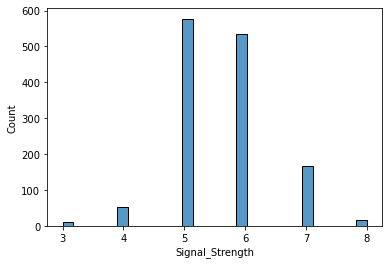

In [145]:
sns.histplot(signal_data2['Signal_Strength']);

- The Target variable is imbalanced
- Most of the values are distributes as 5 and 6

## Part A - Q1 E - Share insights from the initial data analysis (at least 2).

In [146]:
signal_data2.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

In [147]:
signal_data2.describe().T

count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                      75%        max  
Parameter 1       9.20000   15.90000  
Parameter 2       0.64000    1.58000  
Parameter 3       0.43000    1.00000  
Parameter 4       2.60000   15.50000  
Parameter 5       0.09100    0.61100  
Parameter 6      21.00000   72.00000  
Parameter 7      63.00000  289.00000  
Parameter 8       0.99782    1.00369  
Parameter 9       3.40000    4.01000  
Parameter 10      0.73000    2.00000  
Parameter 11     11.10000   14.90000  
Signal_Strength   6.00000    8.00000

- some of the columns having mean is slightly more than medium

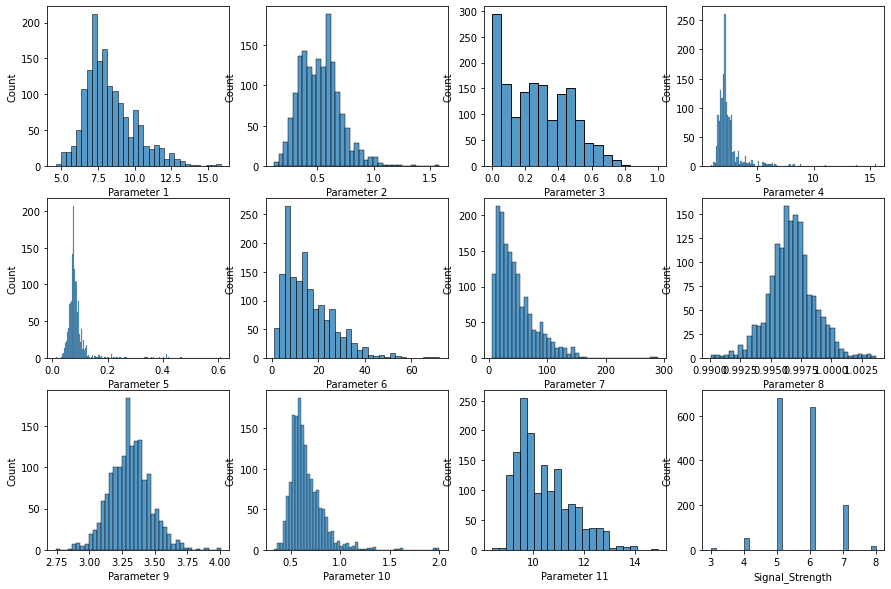

In [148]:
# univariate analysis
count = 1
plt.figure(figsize=(15,10))
for column in signal_data2.columns:
    plt.subplot(3,4,count)
    sns.histplot(signal_data[column])
    count = count+1

- Most of the columns are positively distributed
- Parameter 8 column are seems to be follow Normal distribution

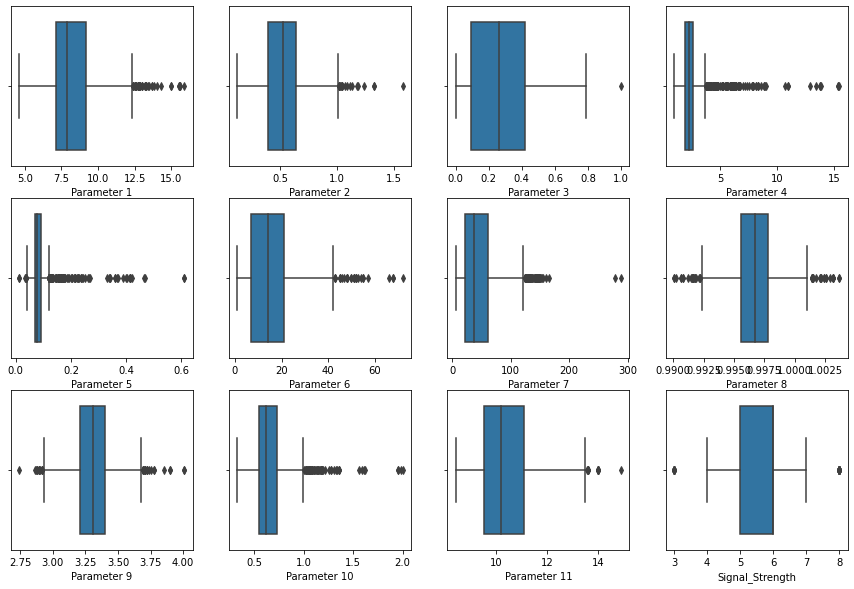

In [149]:
count = 1
plt.figure(figsize=(15,10))
for column in signal_data2.columns:
    plt.subplot(3,4,count)
    sns.boxplot(signal_data[column])
    count = count+1

- It seems to be there are many outliers in the every column
- parameter 3 column seems to have less outliers

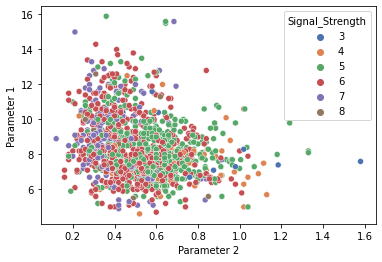

In [150]:
#bivariate analysis
sns.scatterplot(data = signal_data2,y = 'Parameter 1' , x = 'Parameter 2',hue='Signal_Strength',palette='deep');

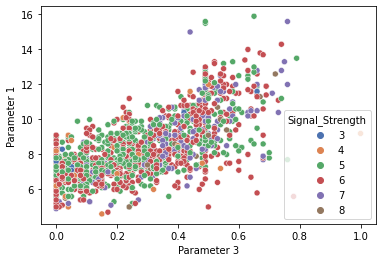

In [151]:
sns.scatterplot(data = signal_data2,y = 'Parameter 1' ,x = 'Parameter 3' , hue = 'Signal_Strength',palette='deep');

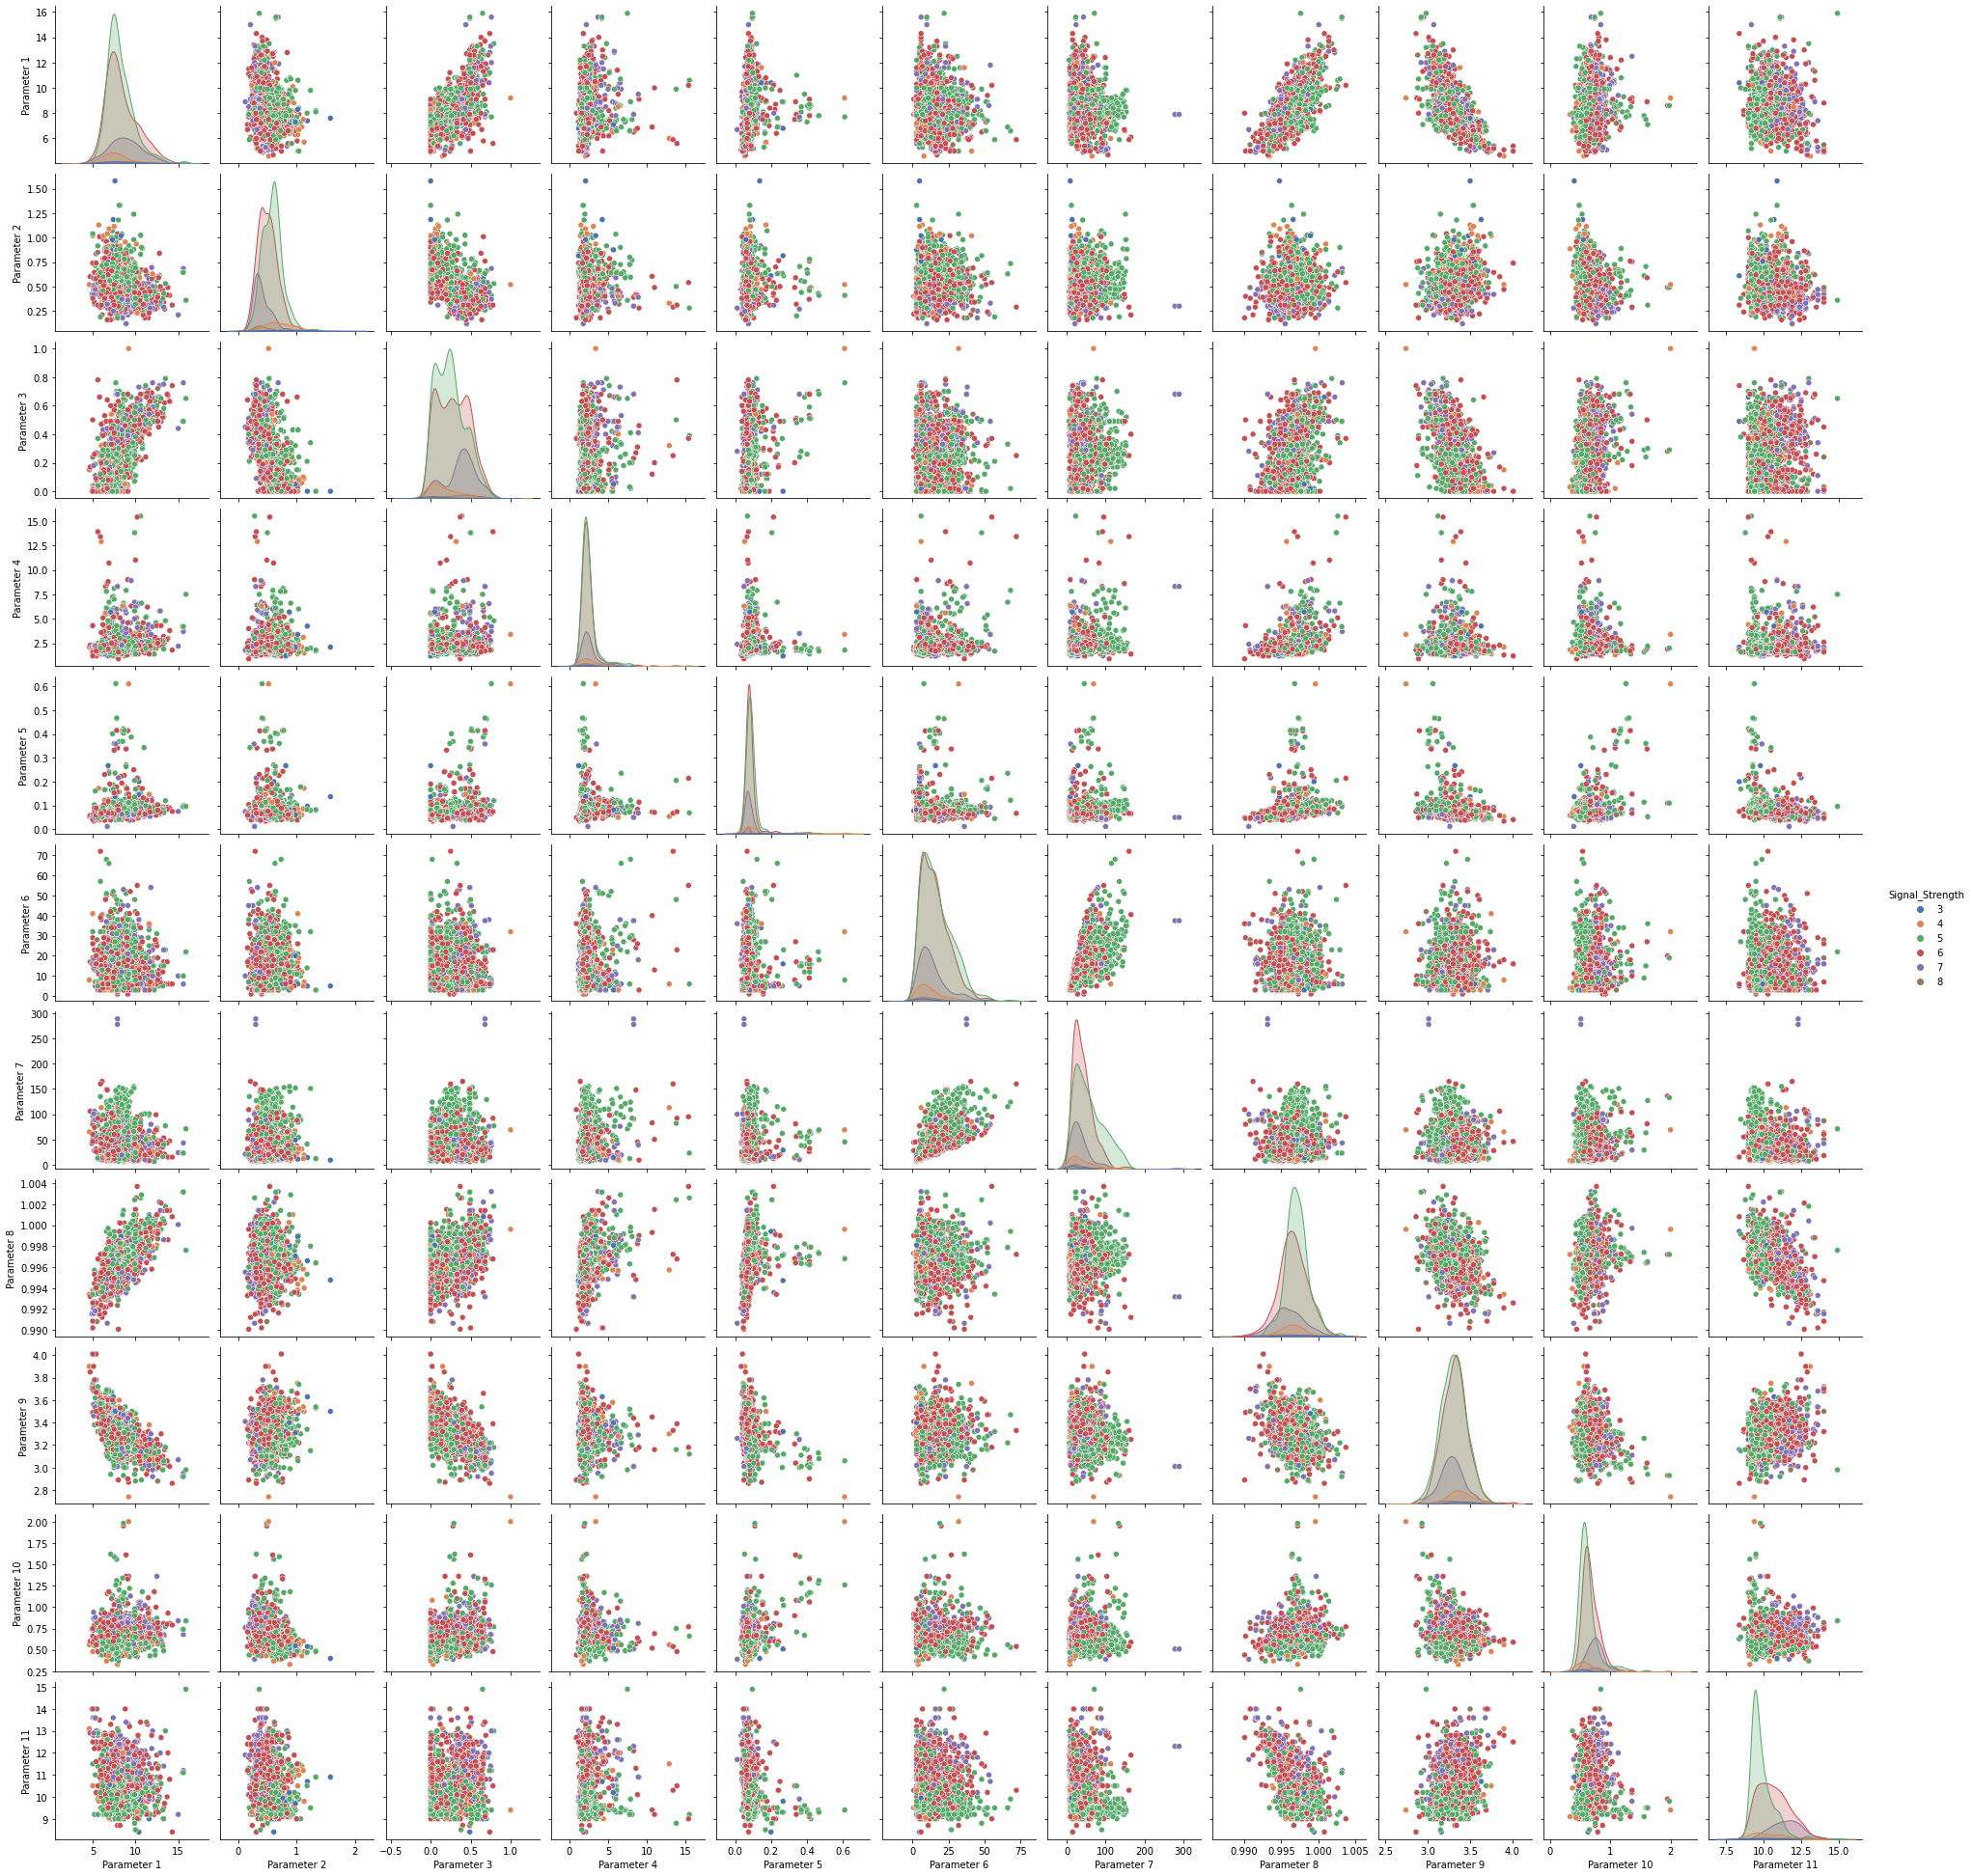

In [152]:
# multivariate analysis
sns.pairplot(signal_data2,diag_kind='kde',hue = 'Signal_Strength',palette='deep');

- from multivraiate analysis the classes are not linearly seperable
- 'Parameter 1' and 'Parameter 8' has some positive correlation
- 'Parameter 1' and 'Parameter 9' has some Negative correlation

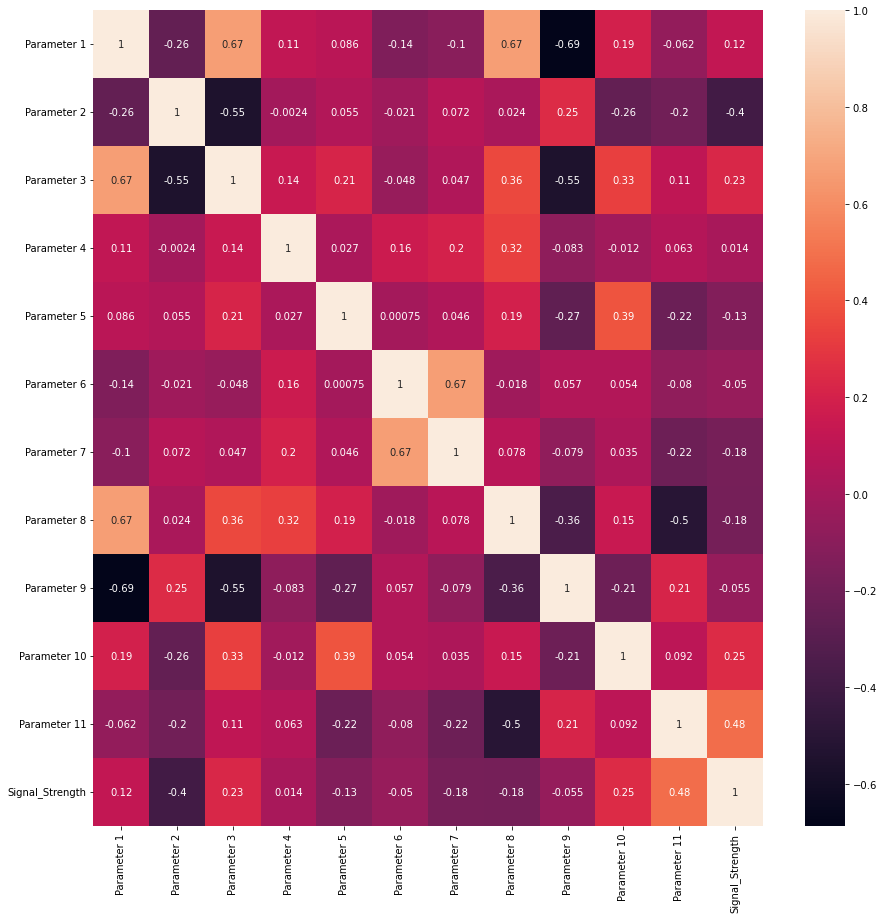

In [153]:
corr = signal_data2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True);

- Observations:
  - as we saw in pair plot 'Parameter 1' and 'Parameter 9' has negative correlation with a value of -0.69
  - 'Parameter 1' and 'Parameter 8' has positive correlation with a value of 0.67
  - 'Parameter 3' and 'Parameter 9' has negative correlation with a value of -0.55
  - 'Parameter 8' and 'Parameter 11' has negative correlation with a value of -0.5

## Part A - Q2 A - Split the data into X & Y.

In [154]:
# split the data into x and y
X = signal_data2.drop('Signal_Strength',axis = 1)
Y = signal_data2['Signal_Strength']
X.shape,Y.shape

((1359, 11), (1359,))

In [155]:
Y.value_counts().sort_index()

3     10
4     53
5    577
6    535
7    167
8     17
Name: Signal_Strength, dtype: int64

In [156]:
replace = {3:0,
          4:1,
          5:2,
          6:3,
          7:4,
          8:5}
Y = Y.replace(replace)

In [157]:
Y.value_counts().sort_index()

0     10
1     53
2    577
3    535
4    167
5     17
Name: Signal_Strength, dtype: int64

- Since imbalance in the Target variable I am using SMOTE method to balance it

In [158]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_sm,Y_sm = smt.fit_resample(X,Y)

In [159]:
X_sm.shape,Y_sm.shape

((3462, 11), (3462,))

In [160]:
Y_sm.value_counts().sort_index()

0    577
1    577
2    577
3    577
4    577
5    577
Name: Signal_Strength, dtype: int64

## Part A - Q2 B - Split the data into train & test with 70:30 proportion.

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X_sm,Y_sm,test_size=0.3,random_state=42)

## Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [162]:
print(X_train.shape,X_test.shape)

(2423, 11) (1039, 11)


In [163]:
print(y_train.shape,y_test.shape)

(2423,) (1039,)


In [164]:
y_train.value_counts()

1    432
0    405
5    402
3    397
4    396
2    391
Name: Signal_Strength, dtype: int64

In [165]:
X_train.shape,y_train.shape

((2423, 11), (2423,))

- Training and testing data is sync

## Part A - Q2 D - Normalise the train and test data with appropriate method.

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.fit_transform(X_test)

In [167]:
x_train_scale,x_test_scale

(array([[ 1.34734093, -0.93851422,  1.0003491 , ..., -0.66607665,
          0.63984582,  1.03775608],
        [ 1.41867401, -0.95585508,  1.27086317, ..., -1.18428876,
         -0.03467819,  0.26319364],
        [-1.1240663 , -0.2714215 , -1.06350926, ...,  1.00245497,
          0.79906373,  2.22748519],
        ...,
        [-0.93461291, -0.49252281, -0.94339379, ..., -0.203941  ,
         -0.04786016, -0.9467208 ],
        [ 0.36055008, -1.10069291,  0.20291612, ..., -1.06219291,
         -0.6730474 , -0.28522851],
        [ 0.54951684, -0.78981587,  1.15981022, ..., -0.82445566,
          0.1855857 ,  1.36871358]]),
 array([[ 0.90448989, -1.07795937,  0.85389434, ...,  0.21218696,
          0.83632234, -0.24995183],
        [ 0.17167969,  1.00784273, -1.28607521, ..., -0.78551678,
         -0.52442304, -0.79596818],
        [ 1.56493639, -0.31020776,  1.1840462 , ...,  0.03091441,
          0.45007057, -1.0423288 ],
        ...,
        [ 0.61078361, -0.72638682,  0.13462267, ..., -

## Part A - Q2 E - Transform Labels into format acceptable by Neural Network

In [168]:
from tensorflow.keras.utils import to_categorical

In [169]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 6
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test,num_classes)

In [170]:
y_train_cat

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [171]:
y_train_cat.shape

(2423, 6)

## Part A - Q3 A - Design a Neural Network to train a classifier.

In [172]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer,BatchNormalization,Dropout

In [173]:
classifier = Sequential()
classifier.add(Dense(12,input_shape=(11,),activation = 'relu'))
classifier.add(Dense(8,activation='relu'))
classifier.add(Dense(6,activation='softmax'))
opt = tf.keras.optimizers.Adam()
classifier.compile(loss=losses.categorical_crossentropy,metrics=['accuracy'],optimizer = opt)

In [174]:
classifier.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 12)                144       
                                                                 
 dense_95 (Dense)            (None, 8)                 104       
                                                                 
 dense_96 (Dense)            (None, 6)                 54        
                                                                 
Total params: 302
Trainable params: 302
Non-trainable params: 0
_________________________________________________________________


## Part A - Q3 B - Train the classifier using previously designed Architecture

In [175]:
hist_clf = classifier.fit(x_train_scale,y_train_cat,epochs=40,validation_split=0.2,verbose=2)

Epoch 1/40
61/61 - 2s - loss: 1.7932 - accuracy: 0.2167 - val_loss: 1.7433 - val_accuracy: 0.2639 - 2s/epoch - 38ms/step
Epoch 2/40
61/61 - 0s - loss: 1.6543 - accuracy: 0.3369 - val_loss: 1.6005 - val_accuracy: 0.4206 - 256ms/epoch - 4ms/step
Epoch 3/40
61/61 - 0s - loss: 1.5107 - accuracy: 0.4396 - val_loss: 1.4419 - val_accuracy: 0.4557 - 264ms/epoch - 4ms/step
Epoch 4/40
61/61 - 0s - loss: 1.3631 - accuracy: 0.4768 - val_loss: 1.3012 - val_accuracy: 0.4887 - 266ms/epoch - 4ms/step
Epoch 5/40
61/61 - 0s - loss: 1.2467 - accuracy: 0.5057 - val_loss: 1.2062 - val_accuracy: 0.5258 - 259ms/epoch - 4ms/step
Epoch 6/40
61/61 - 0s - loss: 1.1679 - accuracy: 0.5284 - val_loss: 1.1465 - val_accuracy: 0.5464 - 264ms/epoch - 4ms/step
Epoch 7/40
61/61 - 0s - loss: 1.1174 - accuracy: 0.5366 - val_loss: 1.1089 - val_accuracy: 0.5608 - 261ms/epoch - 4ms/step
Epoch 8/40
61/61 - 0s - loss: 1.0811 - accuracy: 0.5573 - val_loss: 1.0801 - val_accuracy: 0.5588 - 264ms/epoch - 4ms/step
Epoch 9/40
61/61 -

## Part A - Q3 C - Plot 2 separate visuals. 
### i. Training Loss and Validation Loss 
### ii. Training Accuracy and Validation Accuracy

In [176]:
def box_acc(hist):
    a = pd.DataFrame({'acc' : hist.history['accuracy']})
    b = pd.DataFrame({'val_acc' : hist.history['val_accuracy']})
    ab = pd.concat([a,b],axis=1)
    ab.boxplot()
def box_loss(hist):
    a = pd.DataFrame({'loss' : hist.history['loss']})
    b = pd.DataFrame({'val_loss' : hist.history['val_loss']})
    ab = pd.concat([a,b],axis=1)
    ab.boxplot()
def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training','validation'],loc='best')
    plt.show()
def accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['training','validation'],loc='best')
    plt.show()
def metric_func(classifier):
    y_pred=classifier.predict(x_test_scale)
    y_pred_final=[]
    for i in y_pred:
      y_pred_final.append(np.argmax(i))
    print("Classification report as : \n" , classification_report(y_test,y_pred_final))
    cm = confusion_matrix(y_test,y_pred_final)
    plt.figure(figsize=(10,10))
    print("The confusion matrix as : \n")
    sns.heatmap(cm,annot=True,fmt='.2f')

#### I.Training loss vs validation loss

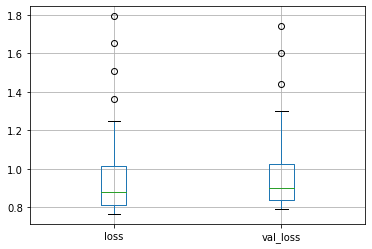

In [177]:
box_loss(hist_clf)

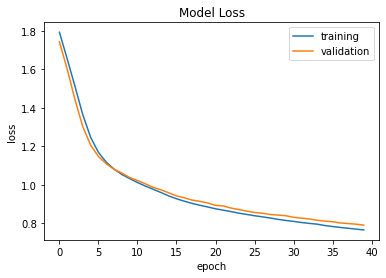

In [178]:
loss_plot(hist_clf)

- As the number of epochs is going on the training loss and validation loss has no change observed

#### ii. Training Accuracy and Validation Accuracy

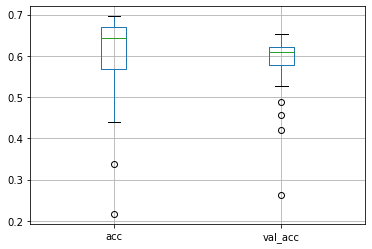

In [179]:
box_acc(hist_clf)

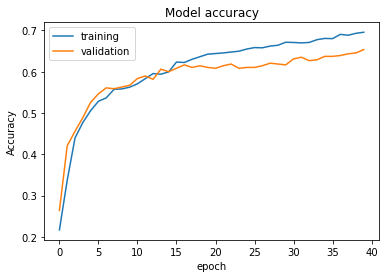

In [180]:
accuracy_plot(hist_clf)

- As the number of epochs is going on the training accuracy and validation accuracy only a small variation observed

- But overall my model is underfit model

In [181]:
from sklearn.metrics import classification_report,confusion_matrix

In [182]:
clf_evat = classifier.evaluate(x_test_scale,y_test_cat)

33/33 [==============================] - 0s 2ms/step - loss: 0.8450 - accuracy: 0.6420


By the above result we can specify its a clear case of underfit model,I need to train my model little more complex

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       172
           1       0.60      0.80      0.69       145
           2       0.53      0.47      0.50       186
           3       0.47      0.32      0.38       180
           4       0.59      0.50      0.54       181
           5       0.69      0.85      0.76       175

    accuracy                           0.64      1039
   macro avg       0.63      0.65      0.63      1039
weighted avg       0.62      0.64      0.63      1039

The confusion matrix as : 



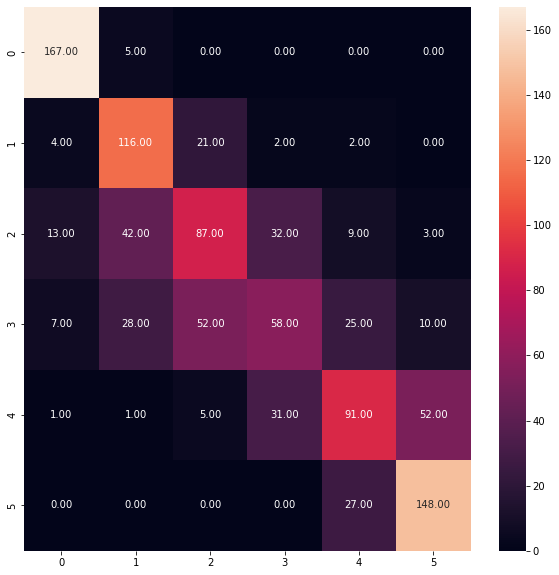

In [183]:
metric_func(classifier)

## Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.

- since last model we trained less number epochs it may gone to underfit,Now I'll try with more number of epochs

In [184]:
classifier_1 = Sequential()
classifier_1.add(Dense(12,input_shape=(11,),activation = 'relu'))
classifier_1.add(Dense(8,activation='relu'))
classifier_1.add(Dense(6,activation='softmax'))
opt = tf.keras.optimizers.Adam()
classifier_1.compile(loss=losses.categorical_crossentropy,metrics=['accuracy'],optimizer = opt)

In [185]:
classifier_1.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 12)                144       
                                                                 
 dense_98 (Dense)            (None, 8)                 104       
                                                                 
 dense_99 (Dense)            (None, 6)                 54        
                                                                 
Total params: 302
Trainable params: 302
Non-trainable params: 0
_________________________________________________________________


In [186]:
hist_clf_1 = classifier_1.fit(x_train_scale,y_train_cat,validation_split=0.2,epochs=100,verbose=2)

Epoch 1/100
61/61 - 2s - loss: 1.7025 - accuracy: 0.2508 - val_loss: 1.6538 - val_accuracy: 0.3113 - 2s/epoch - 38ms/step
Epoch 2/100
61/61 - 0s - loss: 1.5964 - accuracy: 0.3385 - val_loss: 1.5386 - val_accuracy: 0.4082 - 265ms/epoch - 4ms/step
Epoch 3/100
61/61 - 0s - loss: 1.4928 - accuracy: 0.4133 - val_loss: 1.4274 - val_accuracy: 0.4784 - 275ms/epoch - 5ms/step
Epoch 4/100
61/61 - 0s - loss: 1.3841 - accuracy: 0.4572 - val_loss: 1.3157 - val_accuracy: 0.5072 - 304ms/epoch - 5ms/step
Epoch 5/100
61/61 - 0s - loss: 1.2793 - accuracy: 0.4809 - val_loss: 1.2173 - val_accuracy: 0.5175 - 269ms/epoch - 4ms/step
Epoch 6/100
61/61 - 0s - loss: 1.1953 - accuracy: 0.5046 - val_loss: 1.1454 - val_accuracy: 0.5402 - 290ms/epoch - 5ms/step
Epoch 7/100
61/61 - 0s - loss: 1.1359 - accuracy: 0.5279 - val_loss: 1.1019 - val_accuracy: 0.5670 - 284ms/epoch - 5ms/step
Epoch 8/100
61/61 - 0s - loss: 1.0935 - accuracy: 0.5392 - val_loss: 1.0684 - val_accuracy: 0.5670 - 275ms/epoch - 5ms/step
Epoch 9/10

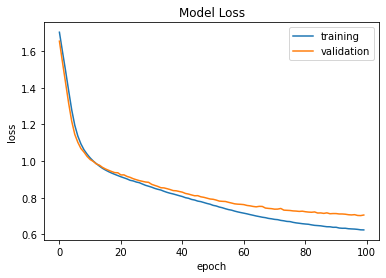

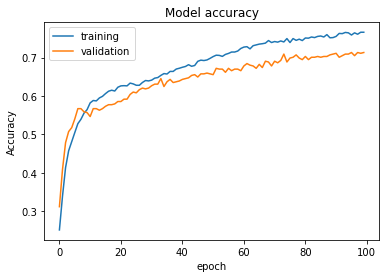

(None, None)

In [187]:
loss_plot(hist_clf_1),accuracy_plot(hist_clf_1)

In [188]:
classifier_1.evaluate(x_test_scale,y_test_cat)

33/33 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.7113


[0.712177038192749, 0.7112608551979065]

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       172
           1       0.66      0.85      0.75       145
           2       0.57      0.51      0.54       186
           3       0.47      0.35      0.40       180
           4       0.68      0.66      0.67       181
           5       0.86      0.95      0.91       175

    accuracy                           0.71      1039
   macro avg       0.70      0.72      0.70      1039
weighted avg       0.69      0.71      0.70      1039

The confusion matrix as : 



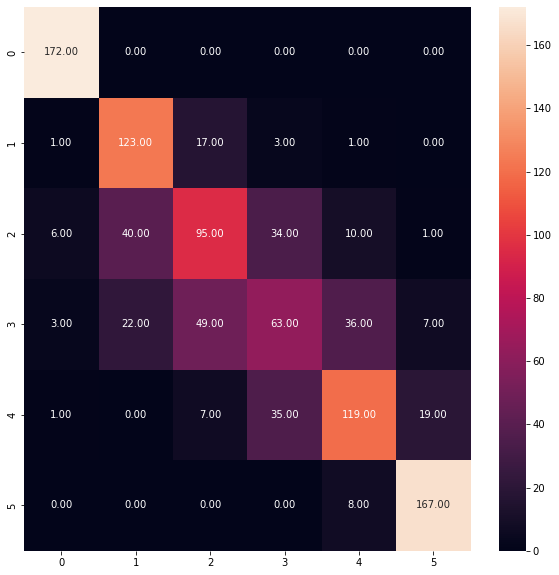

In [189]:
metric_func(classifier_1)

- Now Our model slight increment in accuracy is observed

In [190]:
def evaluate(classifier):
    eval = classifier.evaluate(x_test_scale,y_test_cat)
    print("loss and accuracy are : " ,eval)

In [191]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping

In [192]:
earl_stp = EarlyStopping(patience=5)

In [193]:
def model_dev(a=44,bn = False,bn1 = False,bn2=False,do=False,do1 = False,do2=False,add1 = False,add2 = False,add3 = False,add4 = False,b=None,c=None,d=None,e=None,act_func = 'relu',wt1 = 'glorot_uniform',opt = 'adam',epochs = 100,batch_size = 32,es = earl_stp):
    model = Sequential()
    model.add(Dense(a,input_shape=(11,),activation = act_func,kernel_initializer=wt1))
    if bn :
        model.add(BatchNormalization())
    if do :
        model.add(Dropout(0.2))
    if add1 :
        model.add(Dense(b,activation = act_func,kernel_initializer=wt1))
        if bn1 :
            model.add(BatchNormalization())
        if do1 :
            model.add(Dropout(0.1))
    if add2 :
        model.add(Dense(c,activation = act_func,kernel_initializer=wt1))
        if bn2 :
            model.add(BatchNormalization())
        if do2 :
            model.add(Dropout(0.2))
    if add3 :
        model.add(Dense(d,activation = act_func,kernel_initializer=wt1))
    if add4 :
        model.add(Dense(e,activation = act_func,kernel_initializer=wt1))
    model.add(Dense(6,activation='softmax'))
    model.compile(optimizer=opt,loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
    hist = model.fit(x_train_scale,y_train_cat,validation_split=0.2,epochs=epochs,callbacks=earl_stp,batch_size = batch_size,verbose = 0)
    print("*-*"*30)
    print("\n")
    evaluate(model)
    loss_plot(hist)
    accuracy_plot(hist)
    metric_func(model)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.7478
loss and accuracy are :  [0.6678460836410522, 0.7478344440460205]


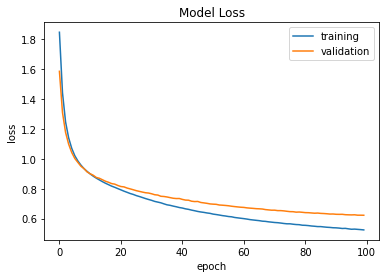

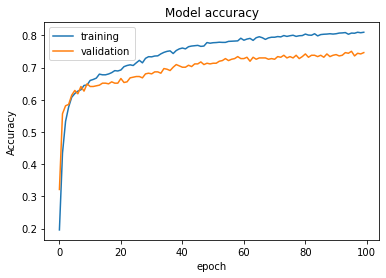

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       172
           1       0.75      0.94      0.83       145
           2       0.65      0.54      0.59       186
           3       0.51      0.42      0.46       180
           4       0.71      0.67      0.69       181
           5       0.85      0.98      0.91       175

    accuracy                           0.75      1039
   macro avg       0.73      0.76      0.74      1039
weighted avg       0.73      0.75      0.74      1039

The confusion matrix as : 



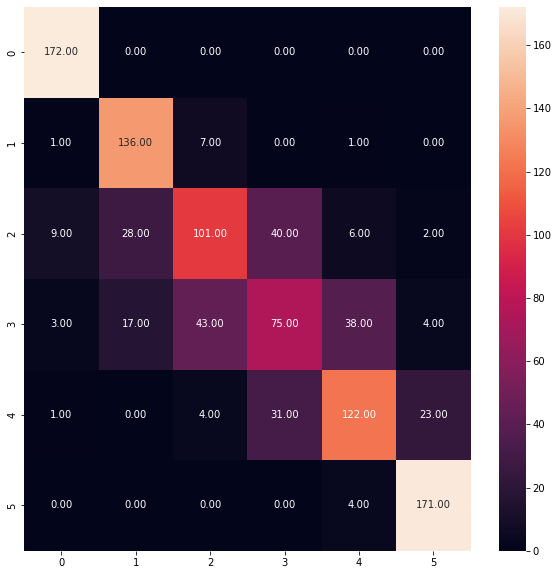

In [194]:
model_dev()

- There is a variation observed in accuracy loss and validation loss
- our model is now in overfit

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.7584
loss and accuracy are :  [0.6505299210548401, 0.7584215402603149]


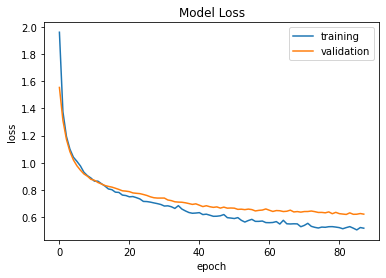

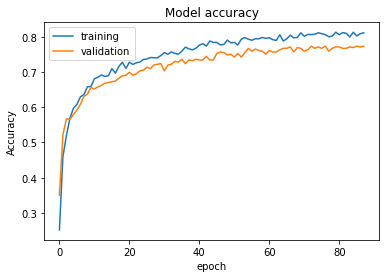

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       172
           1       0.77      0.94      0.85       145
           2       0.66      0.55      0.60       186
           3       0.51      0.39      0.44       180
           4       0.71      0.73      0.72       181
           5       0.89      0.98      0.93       175

    accuracy                           0.76      1039
   macro avg       0.75      0.77      0.75      1039
weighted avg       0.74      0.76      0.75      1039

The confusion matrix as : 



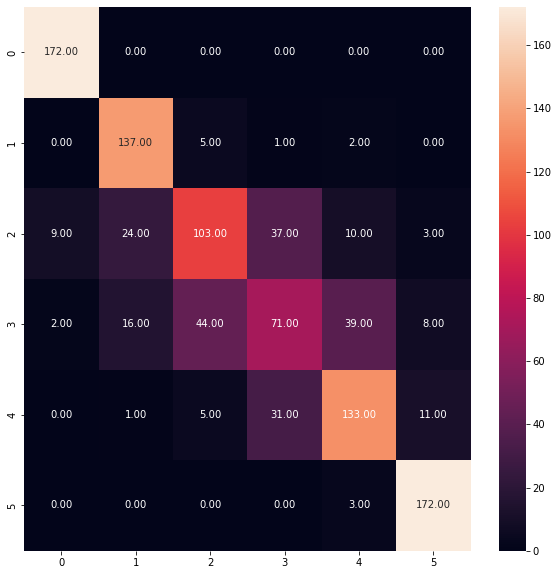

In [195]:
model_dev(a=44,bn=True)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 5ms/step - loss: 0.6769 - accuracy: 0.7526
loss and accuracy are :  [0.6768950819969177, 0.752646803855896]


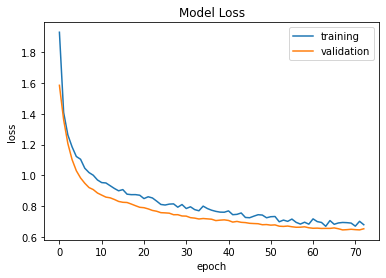

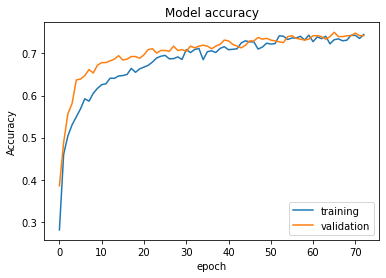

33/33 [==============================] - 0s 3ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       172
           1       0.71      0.92      0.80       145
           2       0.66      0.53      0.59       186
           3       0.52      0.43      0.47       180
           4       0.74      0.72      0.73       181
           5       0.91      0.98      0.95       175

    accuracy                           0.75      1039
   macro avg       0.74      0.76      0.75      1039
weighted avg       0.74      0.75      0.74      1039

The confusion matrix as : 



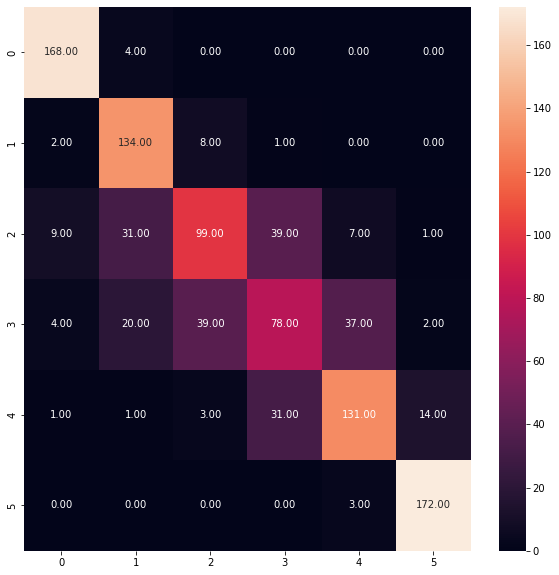

In [196]:
model_dev(a=44,bn=True,do=True)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.7565
loss and accuracy are :  [0.647642195224762, 0.7564966082572937]


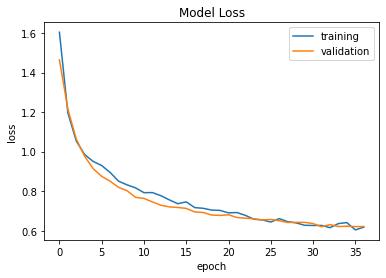

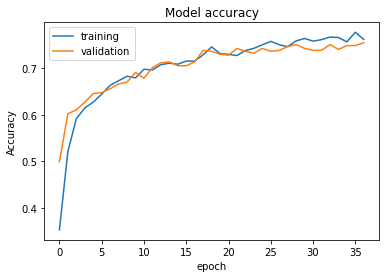

33/33 [==============================] - 0s 3ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       172
           1       0.73      0.90      0.81       145
           2       0.65      0.55      0.59       186
           3       0.53      0.41      0.46       180
           4       0.76      0.74      0.75       181
           5       0.86      1.00      0.93       175

    accuracy                           0.76      1039
   macro avg       0.74      0.77      0.75      1039
weighted avg       0.74      0.76      0.74      1039

The confusion matrix as : 



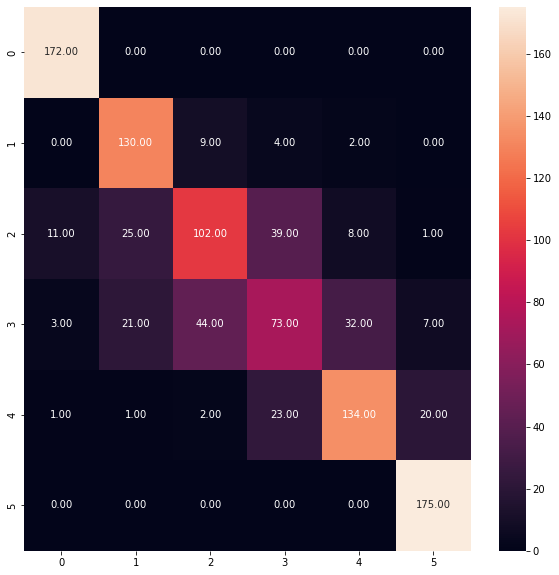

In [197]:
model_dev(bn=True,do=True,add1=True,b=44)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.7796
loss and accuracy are :  [0.5841214656829834, 0.7795957922935486]


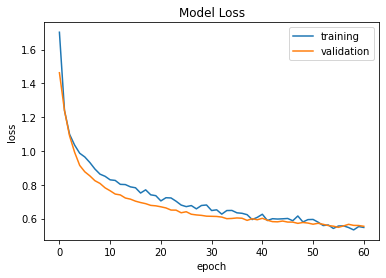

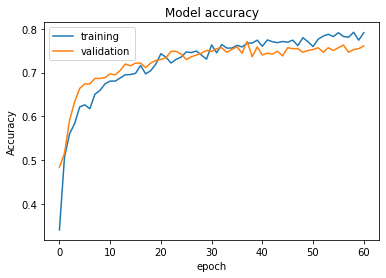

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       172
           1       0.80      0.97      0.88       145
           2       0.65      0.60      0.62       186
           3       0.55      0.38      0.45       180
           4       0.75      0.80      0.77       181
           5       0.90      1.00      0.95       175

    accuracy                           0.78      1039
   macro avg       0.76      0.79      0.77      1039
weighted avg       0.76      0.78      0.77      1039

The confusion matrix as : 



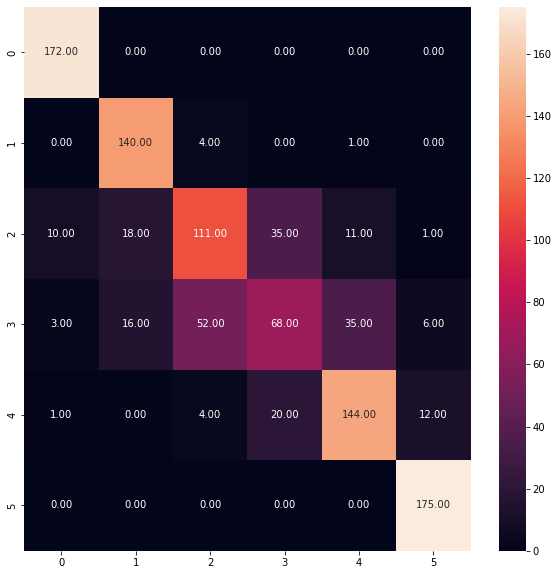

In [198]:
model_dev(bn=True,do=True,add1=True,b=44,bn1=True)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.7594
loss and accuracy are :  [0.5925556421279907, 0.759384036064148]


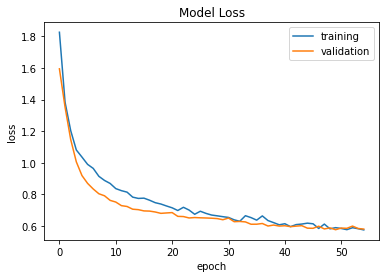

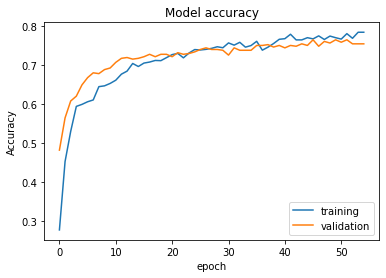

33/33 [==============================] - 1s 7ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       172
           1       0.76      0.92      0.83       145
           2       0.64      0.53      0.58       186
           3       0.50      0.38      0.44       180
           4       0.73      0.78      0.76       181
           5       0.91      0.99      0.95       175

    accuracy                           0.76      1039
   macro avg       0.74      0.77      0.75      1039
weighted avg       0.74      0.76      0.75      1039

The confusion matrix as : 



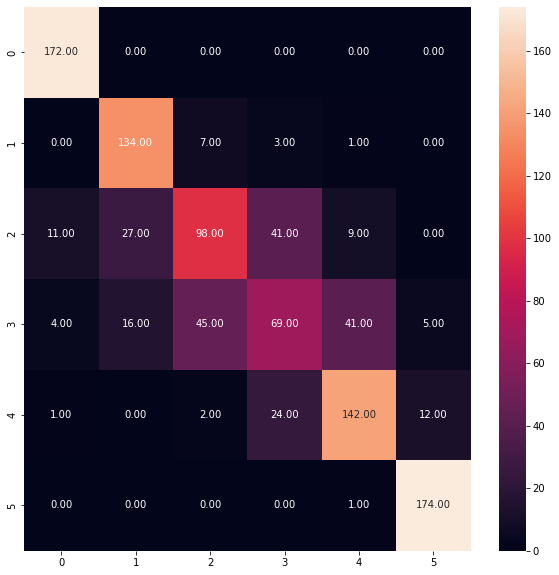

In [199]:
model_dev(bn=True,do=True,add1=True,b=30,bn1=True,add2=True,c=20)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.5811 - accuracy: 0.7632
loss and accuracy are :  [0.5811459422111511, 0.7632339000701904]


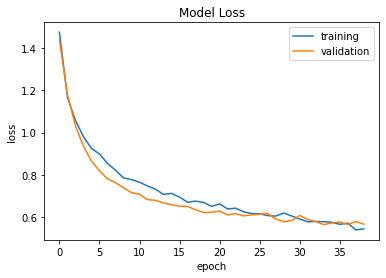

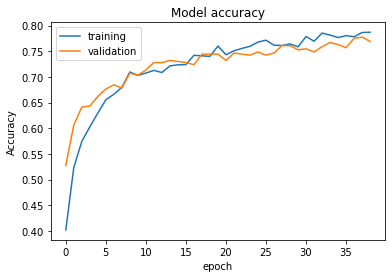

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       172
           1       0.71      0.98      0.82       145
           2       0.70      0.38      0.49       186
           3       0.51      0.47      0.49       180
           4       0.75      0.83      0.79       181
           5       0.91      0.99      0.95       175

    accuracy                           0.76      1039
   macro avg       0.75      0.78      0.75      1039
weighted avg       0.75      0.76      0.75      1039

The confusion matrix as : 



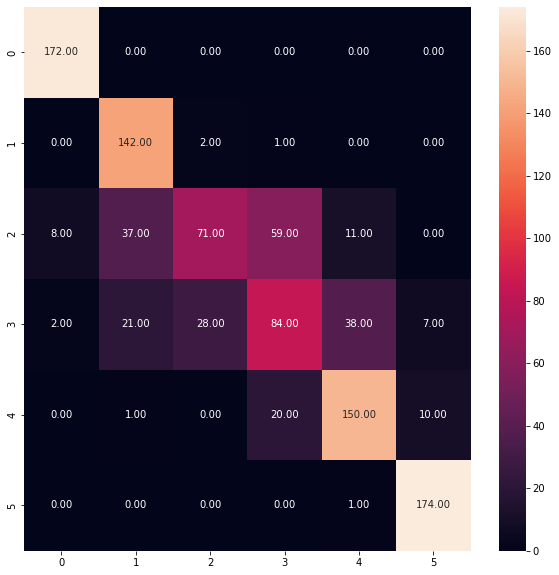

In [200]:
model_dev(bn=True,do=True,add1=True,b=44,bn1=True,add2=True,c=44)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.7517
loss and accuracy are :  [0.645025908946991, 0.751684308052063]


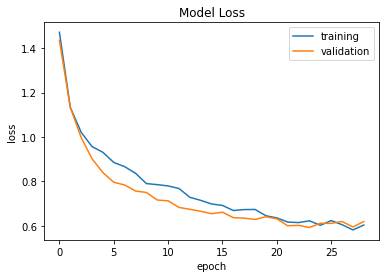

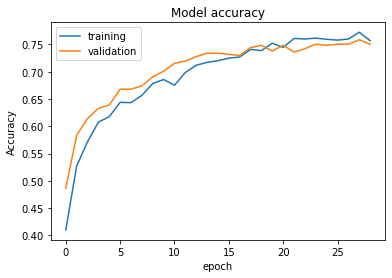

33/33 [==============================] - 0s 3ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       172
           1       0.74      0.96      0.83       145
           2       0.65      0.54      0.59       186
           3       0.56      0.36      0.44       180
           4       0.72      0.72      0.72       181
           5       0.81      1.00      0.90       175

    accuracy                           0.75      1039
   macro avg       0.74      0.76      0.74      1039
weighted avg       0.73      0.75      0.73      1039

The confusion matrix as : 



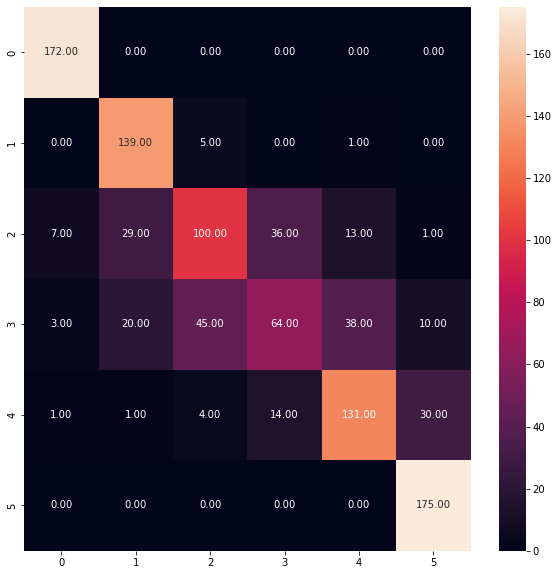

In [201]:
model_dev(bn=True,do=True,add1=True,b=44,bn1=True,add2=True,c=44,add3=True,d=44)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.7411
loss and accuracy are :  [0.6202229857444763, 0.7410972118377686]


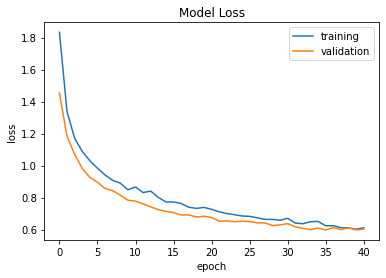

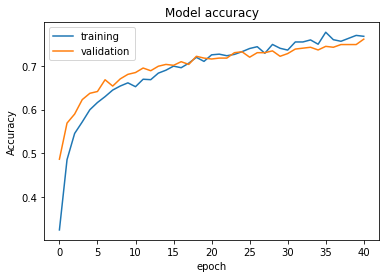

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       172
           1       0.71      0.90      0.79       145
           2       0.62      0.52      0.56       186
           3       0.51      0.40      0.45       180
           4       0.76      0.70      0.73       181
           5       0.84      0.99      0.91       175

    accuracy                           0.74      1039
   macro avg       0.73      0.75      0.73      1039
weighted avg       0.72      0.74      0.73      1039

The confusion matrix as : 



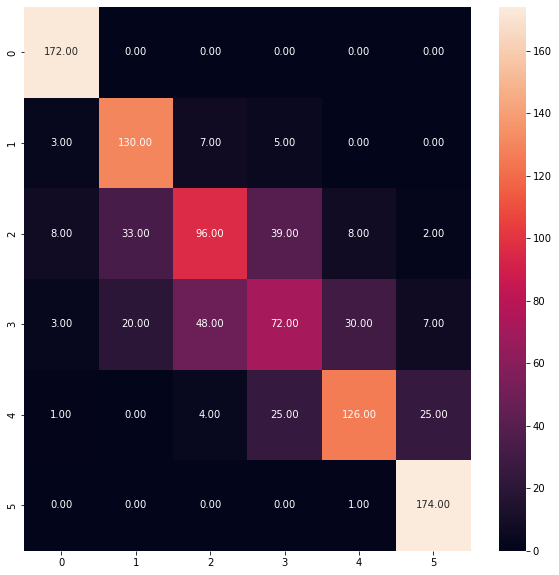

In [202]:
model_dev(bn=True,do=True,add1=True,b=44,bn1=True,add2=True,c=44,wt1='he_uniform')

In [203]:
opt1 = tf.keras.optimizers.RMSprop(rho=0.99)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7526
loss and accuracy are :  [0.6239337921142578, 0.752646803855896]


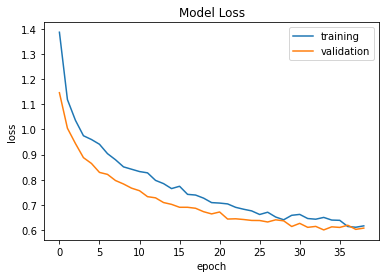

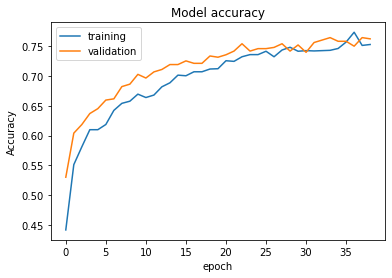

33/33 [==============================] - 0s 3ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       172
           1       0.79      0.94      0.86       145
           2       0.64      0.52      0.57       186
           3       0.50      0.37      0.42       180
           4       0.71      0.77      0.74       181
           5       0.86      0.99      0.92       175

    accuracy                           0.75      1039
   macro avg       0.74      0.76      0.74      1039
weighted avg       0.73      0.75      0.74      1039

The confusion matrix as : 



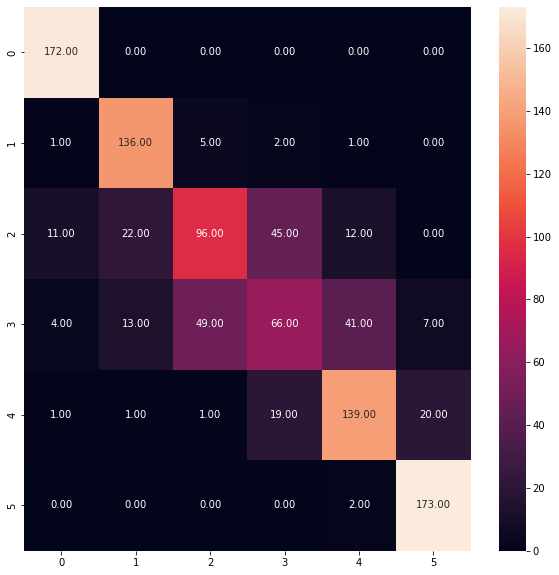

In [204]:
model_dev(bn=True,do=True,add1=True,b=44,bn1=True,add2=True,c=44,wt1='he_uniform',opt=opt1)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.7623
loss and accuracy are :  [0.5936322212219238, 0.7622714042663574]


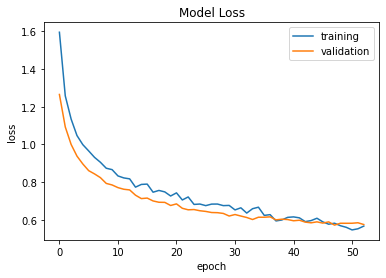

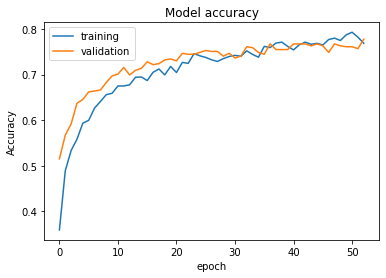

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       172
           1       0.77      0.93      0.84       145
           2       0.66      0.56      0.61       186
           3       0.52      0.40      0.45       180
           4       0.75      0.75      0.75       181
           5       0.85      0.99      0.92       175

    accuracy                           0.76      1039
   macro avg       0.75      0.77      0.76      1039
weighted avg       0.75      0.76      0.75      1039

The confusion matrix as : 



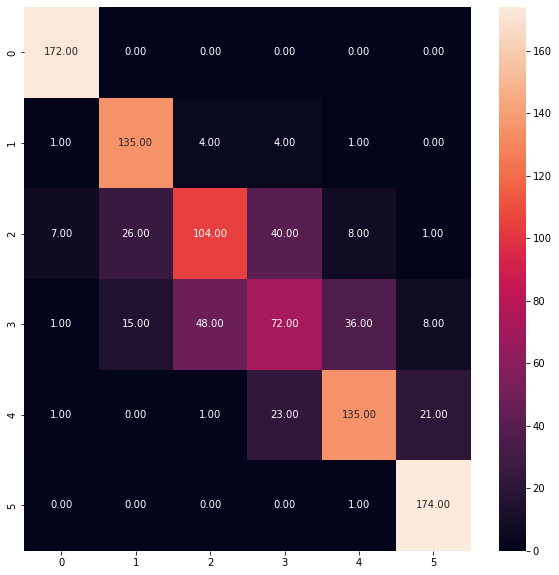

In [205]:
model_dev(a=66,bn=True,do=True,add1=True,b=33,bn1=True,add2=True,c=22,wt1='he_uniform',opt=tf.keras.optimizers.RMSprop(momentum=0.1))

## ## Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


33/33 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.7623
loss and accuracy are :  [0.608428955078125, 0.7622714042663574]


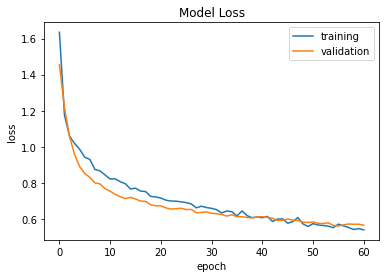

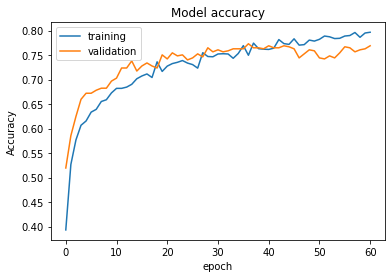

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       172
           1       0.72      0.96      0.82       145
           2       0.65      0.56      0.61       186
           3       0.52      0.38      0.44       180
           4       0.74      0.73      0.74       181
           5       0.92      1.00      0.96       175

    accuracy                           0.76      1039
   macro avg       0.75      0.77      0.75      1039
weighted avg       0.75      0.76      0.75      1039

The confusion matrix as : 



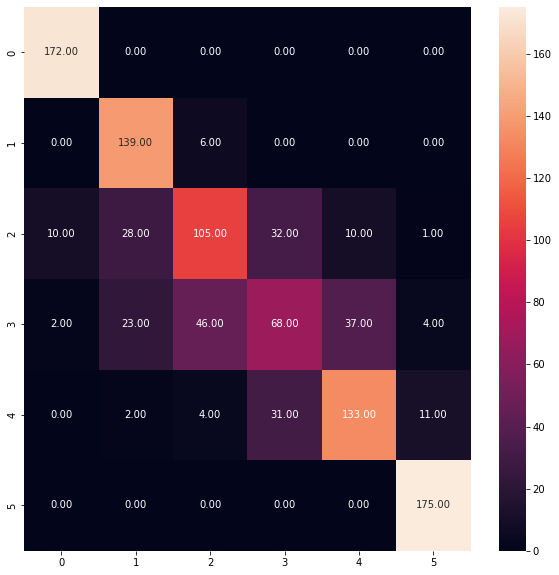

In [206]:
model_dev(bn=True,do=True,add1=True,b=44,bn1=True)

In [207]:
model_final = Sequential()
model_final.add(Dense(44,input_shape=(11,),activation = 'relu'))
model_final.add(BatchNormalization())
model_final.add(Dropout(0.2))
model_final.add(Dense(44,activation = 'relu'))
model_final.add(BatchNormalization())
model_final.add(Dense(6,activation='softmax'))
adam = tf.keras.optimizers.Adam(amsgrad=True,use_ema=True)
model_final.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
history_final = model_final.fit(x_train_scale,y_train_cat,validation_split=0.2,epochs=100,callbacks=earl_stp,batch_size = 32,verbose = 0)

In [208]:
evaluate(model_final)

33/33 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.7690
loss and accuracy are :  [0.5746031403541565, 0.7690086364746094]


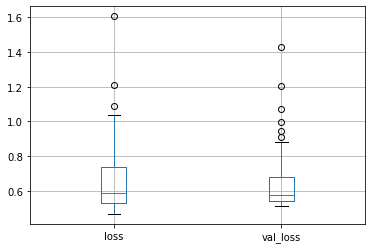

In [209]:
box_loss(history_final)

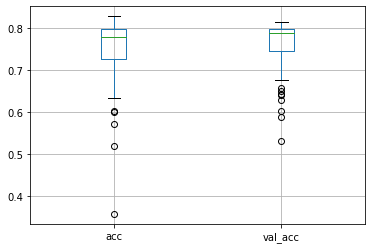

In [210]:
box_acc(history_final)

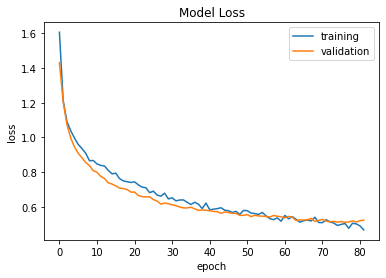

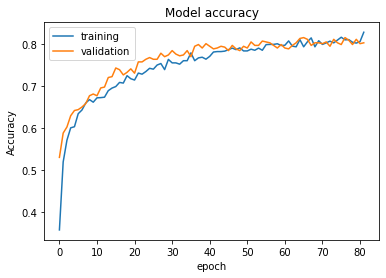

33/33 [==============================] - 0s 2ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       172
           1       0.76      0.94      0.84       145
           2       0.64      0.55      0.59       186
           3       0.50      0.39      0.44       180
           4       0.78      0.78      0.78       181
           5       0.90      1.00      0.95       175

    accuracy                           0.77      1039
   macro avg       0.76      0.78      0.76      1039
weighted avg       0.75      0.77      0.76      1039

The confusion matrix as : 



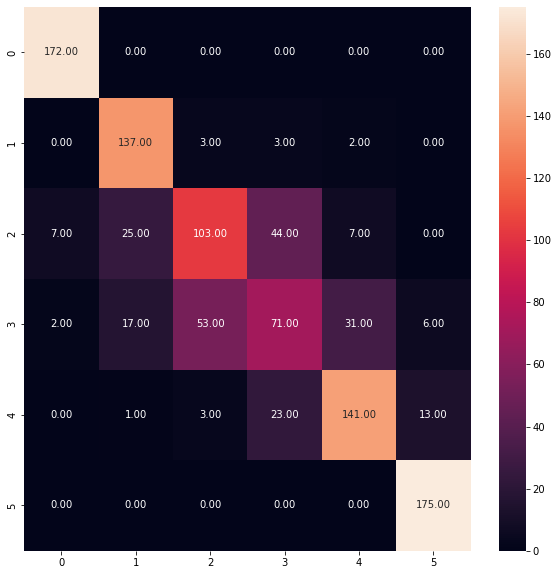

In [211]:
loss_plot(history_final)
accuracy_plot(history_final)
metric_func(model_final)

#### - Insights
 - The data is very less to create neural network model.
 - The classes are highly imbalanced.
 - Initial model accuracy is 65% has been improved by 77% for the final model and this model is regularised.
 - If the data is much more the model becomes much accurate.
 - I tried almost all possible ways ,since the less data its not crossing more than 78% accuracy.

### By taking more amount of data

In [212]:
signal_data3 = signal_data2.sample(2000,replace=True,ignore_index=True)

In [213]:
signal_data3.shape

(2000, 12)

In [214]:
# split the data into x and y
X1 = signal_data3.drop('Signal_Strength',axis = 1)
Y1 = signal_data3['Signal_Strength']
X1.shape,Y1.shape

((2000, 11), (2000,))

In [215]:
rep = {3:0,
       4:1,
       5:2,
       6:3,
       7:4,
       8:5
    
}
Y1 = Y1.replace(rep)
Y1.value_counts()

2    840
3    815
4    229
1     83
5     21
0     12
Name: Signal_Strength, dtype: int64

In [216]:
X1_sm,Y1_sm = SMOTE(random_state=42).fit_resample(X1,Y1)
X1.shape,Y1.shape,Y1_sm.value_counts()

((2000, 11),
 (2000,),
 1    840
 3    840
 2    840
 4    840
 5    840
 0    840
 Name: Signal_Strength, dtype: int64)

In [217]:
X_train,X_test,y_train,y_test  = train_test_split(X1_sm,Y1_sm,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.fit_transform(X_test)

In [218]:
y_train_cat = to_categorical(y_train,6)
y_test_cat = to_categorical(y_test,6)

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


48/48 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8519
loss and accuracy are :  [0.37770581245422363, 0.8518518805503845]


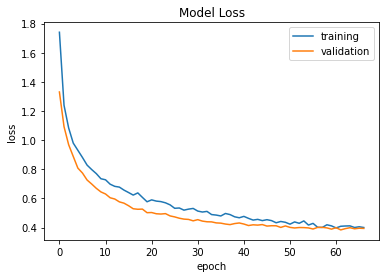

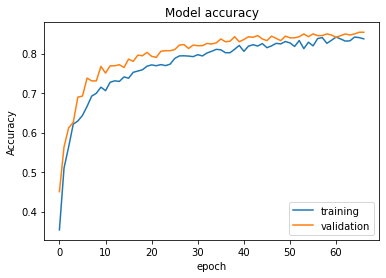

48/48 [==============================] - 0s 3ms/step
Classification report as : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       244
           1       0.87      0.96      0.91       245
           2       0.76      0.69      0.73       262
           3       0.69      0.59      0.63       260
           4       0.83      0.89      0.86       244
           5       0.95      1.00      0.97       257

    accuracy                           0.85      1512
   macro avg       0.85      0.86      0.85      1512
weighted avg       0.84      0.85      0.85      1512

The confusion matrix as : 



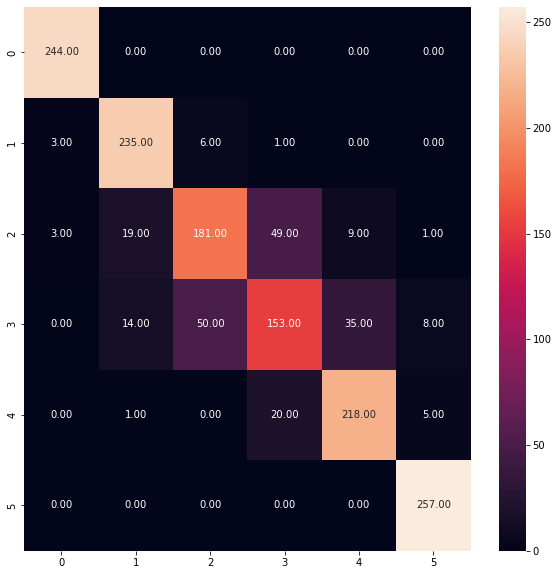

In [219]:
model_dev(a=66,bn=True,do=True,add1=True,b=33,bn1=True,add2=True,c=22,wt1='he_uniform',opt=tf.keras.optimizers.Adam(amsgrad=True,use_ema=True))

# PART - B

• DOMAIN: Autonomous Vehicles

• CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map 
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geolocated patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

• DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised 
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011.

• PROJECT OBJECTIVE : to build a digit classifier on the SVHN (Street View Housing Number) dataset.

In [220]:
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
import random
random.seed(42)
tf.random.set_seed(98)

In [221]:
def hist_plot(hist):
    a = pd.DataFrame({'acc' : hist.history['accuracy']})
    b = pd.DataFrame({'val_acc' : hist.history['val_accuracy']})
    ab = pd.concat([a,b],axis=1)
    ab.boxplot()
def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training','validation'],loc='best')
    plt.show()
def accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['training','validation'],loc='best')
    plt.show()
def evaluate(classifier):
    eval = classifier.evaluate(X_test,y_test)
    print("loss and accuracy are : " ,eval)
def metric_func(classifier):
    y_pred=classifier.predict(X_test)
    y_pred_final=[]
    for i in y_pred:
      y_pred_final.append(np.argmax(i))
    print("The classification report is : \n",classification_report(Y_test,y_pred_final))
    print("The confusion matrix as : \n ")
    cm = confusion_matrix(Y_test,y_pred_final)
    plt.figure(figsize=(20,20))
    sns.heatmap(cm,annot=True,fmt=".1f")

In [222]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.000001,model='auto')

es = EarlyStopping(monitor='val_loss',patience=5)

earl_stp = [checkpoint,reduce_lr,es]

In [223]:
def model_dev(a=700,bn = False,do = False,add1 = False,add2 = False,add3 = False,add4 = False,b=None,c=None,d=None,e=None,act_func = 'relu',wt1 = 'glorot_uniform',opt = 'adam',epochs = 50,batch_size = 512,earl_stp = earl_stp):
    model = Sequential()
    model.add(Dense(a,input_shape=(ima_size,),activation = 'relu',kernel_initializer=wt1))
    if bn :
        model.add(BatchNormalization())
    if do :
        model.add(Dropout(0.5))
    if add1 :
        model.add(Dense(b,activation = act_func,kernel_initializer=wt1))
        if bn :
            model.add(BatchNormalization())
        if do :
            model.add(Dropout(0.3))
    if add2 :
        model.add(Dense(c,activation = act_func,kernel_initializer=wt1))
        if bn :
            model.add(BatchNormalization())
        if do :
            model.add(Dropout(0.2))
    if add3 :
        model.add(Dense(d,activation = act_func,kernel_initializer=wt1))
    if add4 :
        model.add(Dense(e,activation = act_func,kernel_initializer=wt1))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=opt,loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
    hist = model.fit(X_train,y_train,validation_split=0.2,epochs=epochs,callbacks=earl_stp,batch_size = batch_size,verbose = 0)
    print("*-*"*30)
    print("\n")
    evaluate(model)
    loss_plot(hist)
    accuracy_plot(hist)
    metric_func(model)
    

## Part B - Q1 A - Read the .h5 file and assign to a variable.

In [224]:
svhn = h5py.File("Autonomous_Vehicles_SVHN_single_grey1.h5","r")

## Part B - Q1 B - Print all the keys from the .h5 file.

In [225]:
svhn.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test

In [226]:
X_train = svhn['X_val']
X_test = svhn['X_test']
Y_train =svhn['y_val']
Y_test = svhn['y_test']

## Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [227]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 32, 32)
(60000,)
(18000, 32, 32)
(18000,)


## Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.

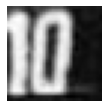

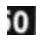

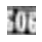

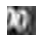

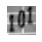

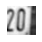

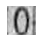

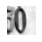

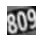

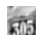

labels for training images are :  [0 0 0 0 0 0 0 0 0 0]


In [228]:
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    plt.show()
print("labels for training images are : " , Y_train[:10])

## Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.

In [229]:
X_train.shape[0]

60000

In [230]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [231]:
X_train.shape,X_test.shape

((60000, 32, 32), (18000, 32, 32))

In [232]:
ima_size = 32*32
X_train = X_train.reshape(len(X_train),ima_size)
X_test = X_test.reshape(len(X_test),ima_size)

In [233]:
X_train.shape,X_test.shape

((60000, 1024), (18000, 1024))

## Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [234]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, Y_train.shape)
print('Test set', X_test.shape, Y_test.shape)

Training set (60000, 1024) (60000,)
Test set (18000, 1024) (18000,)


In [235]:
Y_train_1 = pd.DataFrame(Y_train)
Y_train_1.value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

## Part B - Q2 E - Transform Labels into format acceptable by Neural Network

In [236]:
from tensorflow.keras.utils import to_categorical

In [237]:
num_classes = 10
y_train = to_categorical(Y_train,num_classes)
y_test = to_categorical(Y_test,num_classes)

In [238]:
y_train[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Part B - Q2 F - Print total Number of classes in the Dataset.

In [239]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(18000, 10)


## Part B - Q3 A - Design a Neural Network to train a classifier.

In [240]:
X_train.shape,y_train.shape

((60000, 1024), (60000, 10))

In [241]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD

In [242]:
model = Sequential()
model.add(Dense(700,input_shape=(ima_size,),activation = 'relu'))
model.add(Dense(10,activation='softmax'))

In [243]:
loss = tf.keras.losses.categorical_crossentropy
opt = tf.keras.optimizers.RMSprop(momentum=0.1)

In [244]:
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

In [245]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 700)               717500    
                                                                 
 dense_148 (Dense)           (None, 10)                7010      
                                                                 
Total params: 724,510
Trainable params: 724,510
Non-trainable params: 0
_________________________________________________________________


## Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).

In [246]:
epochs = 50
batch_size = 64

In [247]:
h1 = model.fit(X_train,y_train,validation_split=0.2,epochs=30,callbacks=earl_stp)

Epoch 1/30
1499/1500 [============================>.] - ETA: 0s - loss: 2.1387 - accuracy: 0.2300
Epoch 1: saving model to model_weights.h5
1500/1500 [==============================] - 41s 26ms/step - loss: 2.1385 - accuracy: 0.2302 - val_loss: 2.0187 - val_accuracy: 0.1841 - lr: 0.0010
Epoch 2/30
1500/1500 [==============================] - ETA: 0s - loss: 1.5862 - accuracy: 0.4739
Epoch 2: saving model to model_weights.h5
1500/1500 [==============================] - 33s 22ms/step - loss: 1.5862 - accuracy: 0.4739 - val_loss: 1.5364 - val_accuracy: 0.4245 - lr: 0.0010
Epoch 3/30
1497/1500 [============================>.] - ETA: 0s - loss: 1.3411 - accuracy: 0.5696
Epoch 3: saving model to model_weights.h5
1500/1500 [==============================] - 40s 27ms/step - loss: 1.3415 - accuracy: 0.5694 - val_loss: 1.2484 - val_accuracy: 0.6028 - lr: 0.0010
Epoch 4/30
1500/1500 [==============================] - ETA: 0s - loss: 1.2177 - accuracy: 0.6146
Epoch 4: saving model to model_weights

## Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

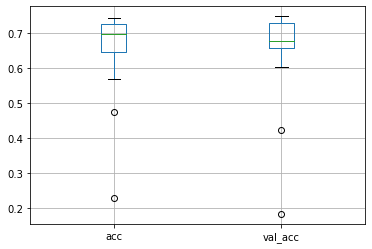

In [248]:
hist_plot(h1)

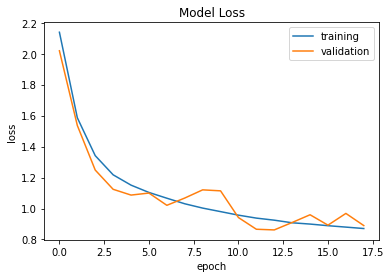

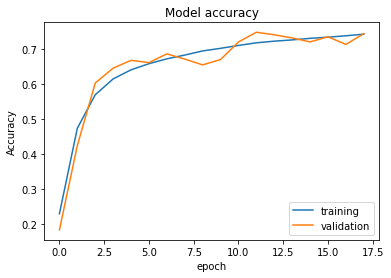

(None, None)

In [249]:
loss_plot(h1),accuracy_plot(h1)

### Observations:
     - model performance is 76%.
     - There is validation accuracy change is observed as the number of epochs going on.
     - upto 3 epochs a huge loss is observed
     - we can increase accuracy by following model_dev function,by incresing our ANN model complexity

## Part B - Q3 C - Evaluate performance of the model with appropriate metrics.

In [250]:
model.evaluate(X_test,y_test)

563/563 [==============================] - 6s 9ms/step - loss: 0.8013 - accuracy: 0.7629


[0.8012673258781433, 0.7628889083862305]

563/563 [==============================] - 4s 7ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      1814
           1       0.71      0.86      0.78      1828
           2       0.86      0.78      0.82      1803
           3       0.56      0.82      0.67      1719
           4       0.88      0.77      0.82      1812
           5       0.80      0.69      0.74      1768
           6       0.77      0.76      0.77      1832
           7       0.85      0.80      0.83      1808
           8       0.78      0.66      0.71      1812
           9       0.89      0.61      0.73      1804

    accuracy                           0.76     18000
   macro avg       0.78      0.76      0.76     18000
weighted avg       0.78      0.76      0.76     18000

The confusion matrix as : 
 


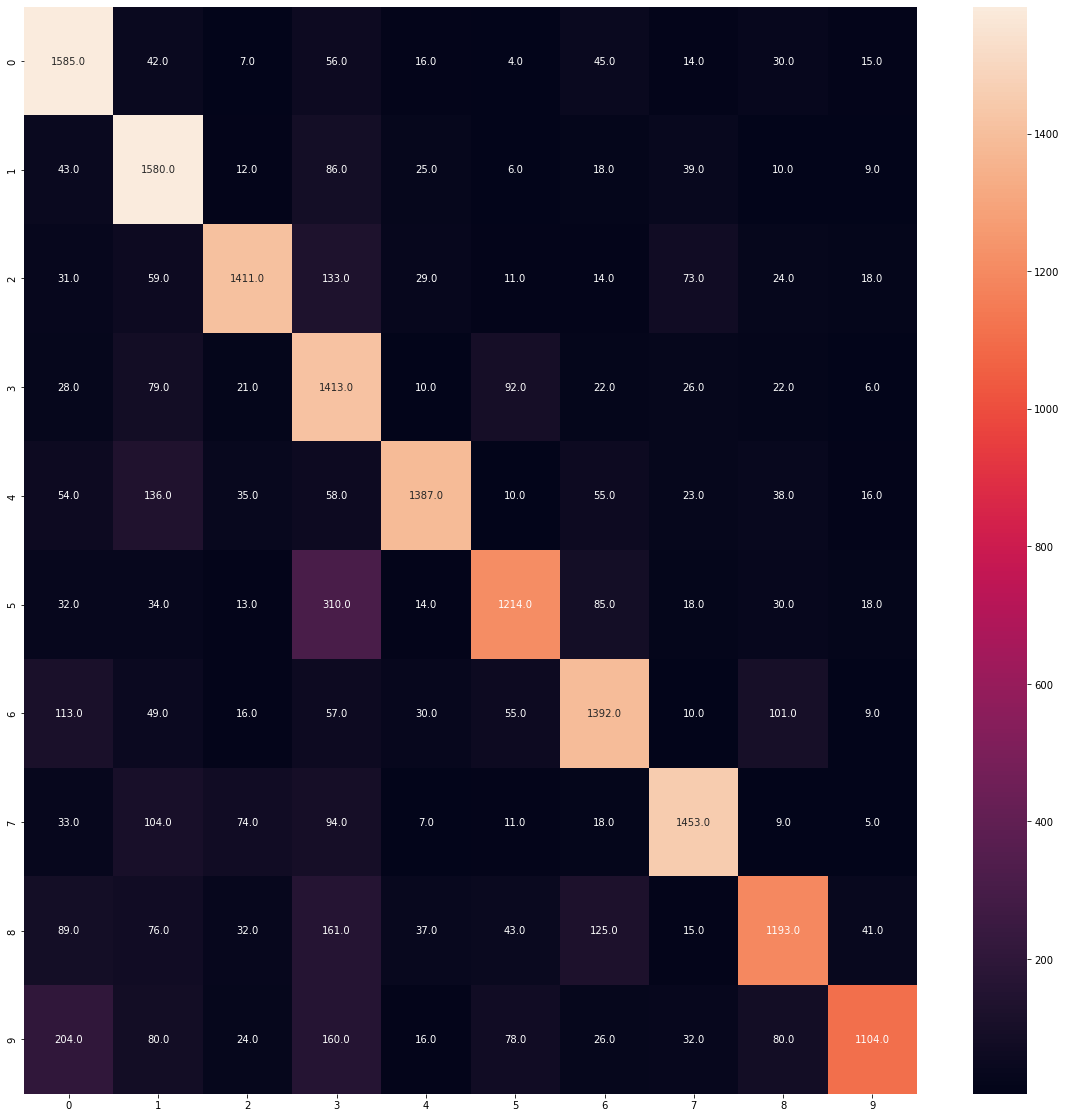

In [251]:
metric_func(model)


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

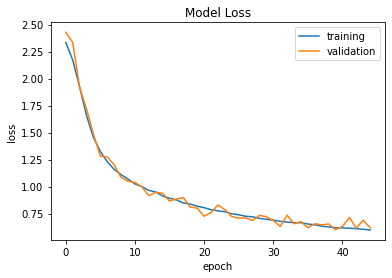

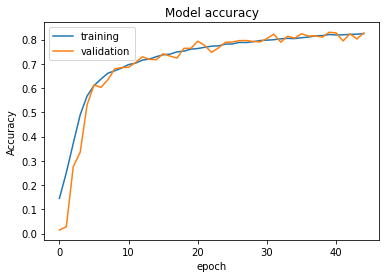

563/563 [==============================] - 3s 4ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      1814
           1       0.73      0.91      0.81      1828
           2       0.87      0.84      0.86      1803
           3       0.69      0.84      0.76      1719
           4       0.94      0.80      0.87      1812
           5       0.86      0.77      0.81      1768
           6       0.87      0.80      0.83      1832
           7       0.87      0.86      0.86      1808
           8       0.80      0.80      0.80      1812
           9       0.85      0.79      0.82      1804

    accuracy                           0.83     18000
   macro avg       0.84      0.83      0.83     18000
weighted avg       0.84      0.83      0.83     18000

The confusion matrix as : 
 


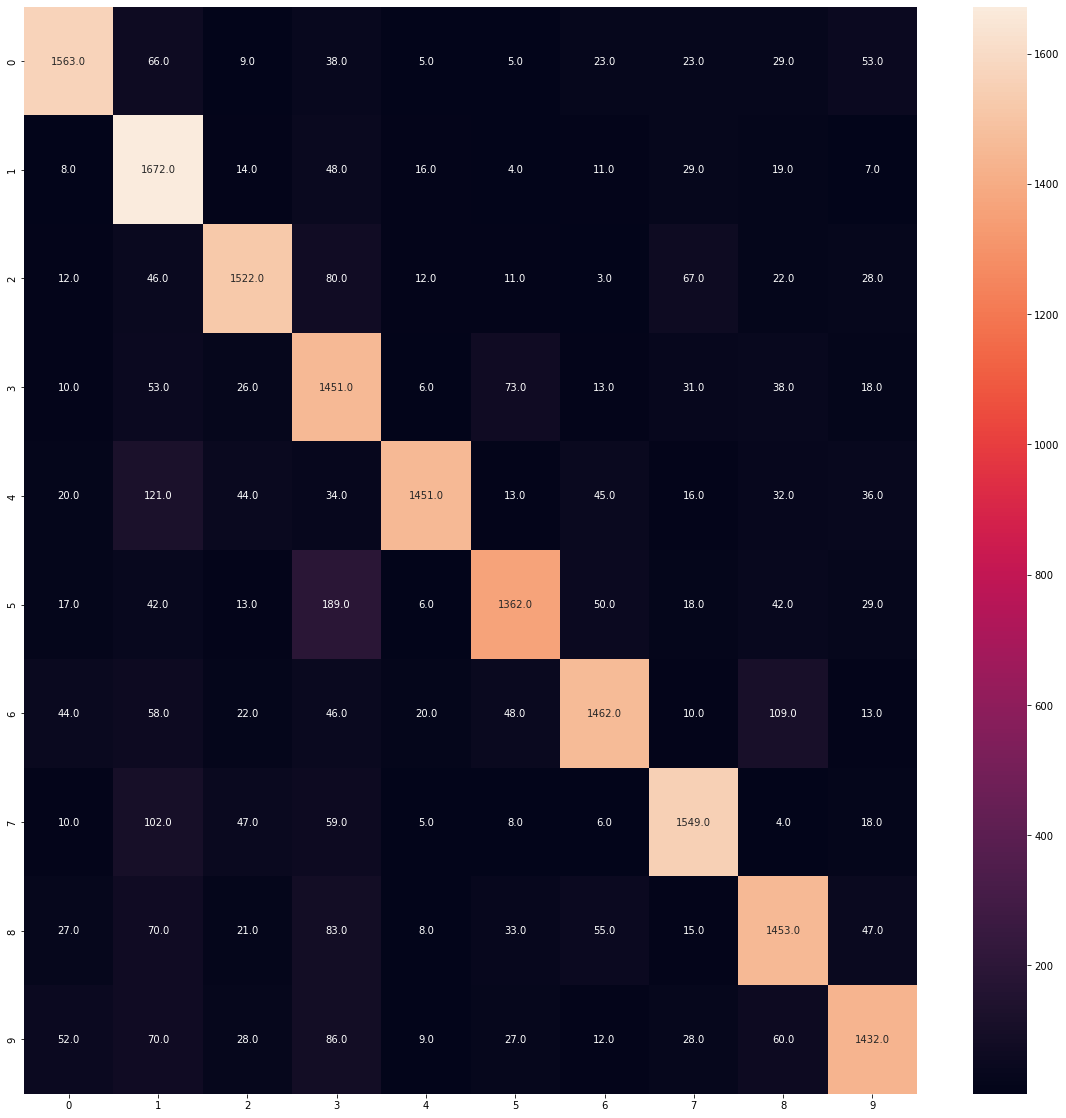

In [252]:
model_dev()


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

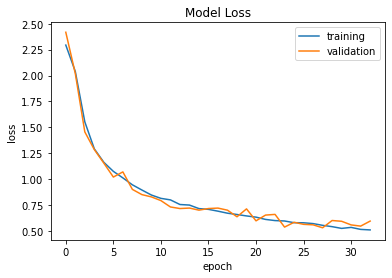

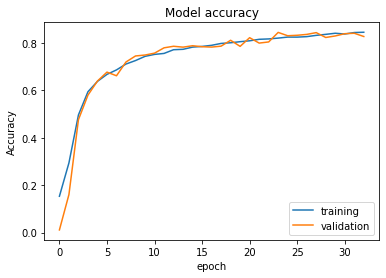

563/563 [==============================] - 3s 6ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1814
           1       0.79      0.90      0.84      1828
           2       0.87      0.86      0.87      1803
           3       0.73      0.85      0.78      1719
           4       0.96      0.81      0.88      1812
           5       0.83      0.82      0.83      1768
           6       0.92      0.74      0.82      1832
           7       0.91      0.85      0.88      1808
           8       0.73      0.85      0.79      1812
           9       0.87      0.79      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.85      0.84      0.84     18000
weighted avg       0.85      0.84      0.84     18000

The confusion matrix as : 
 


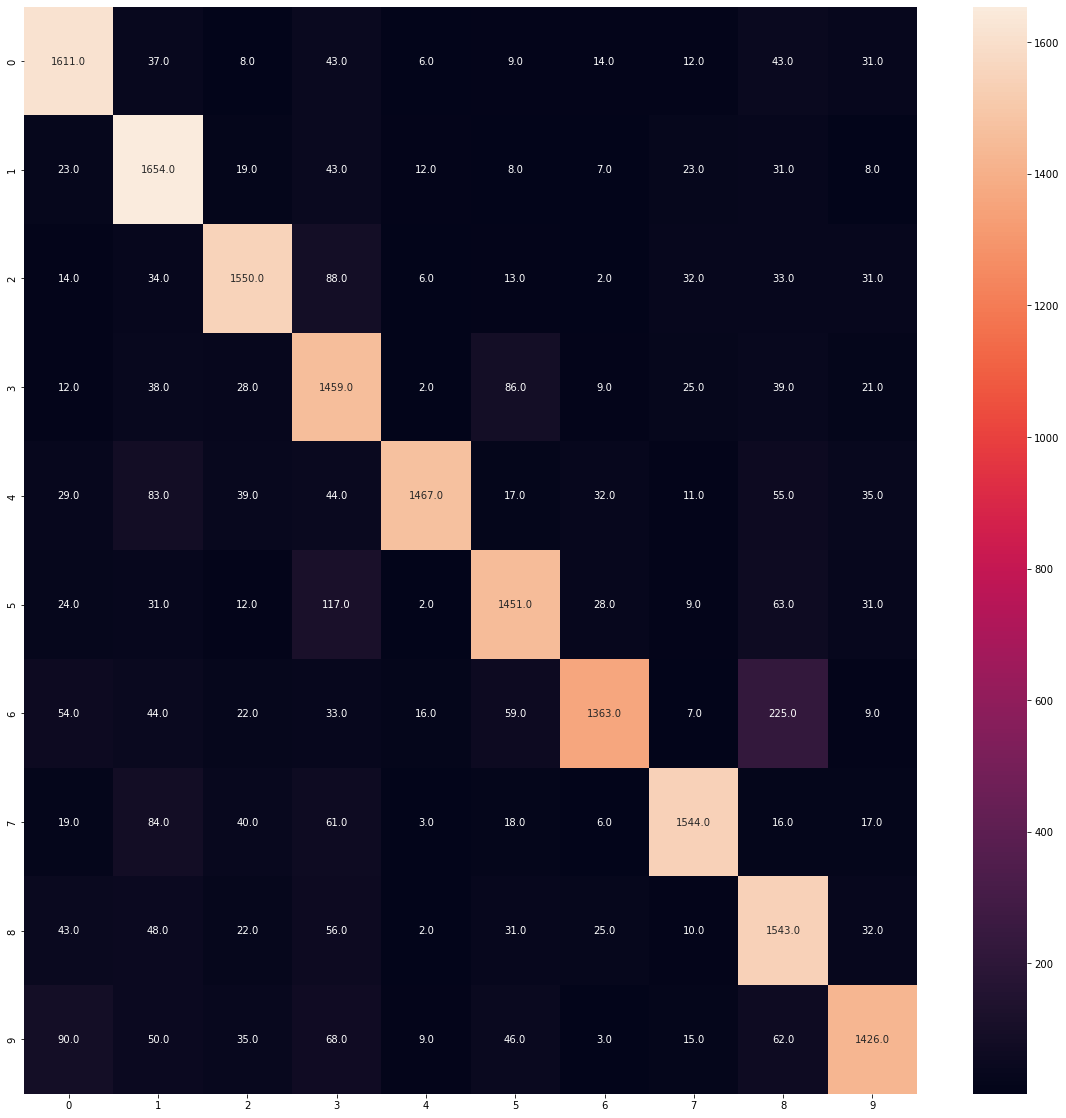

In [253]:
model_dev(a = 700,add1 = True,b=350,act_func='relu')


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

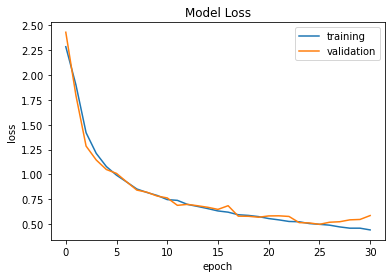

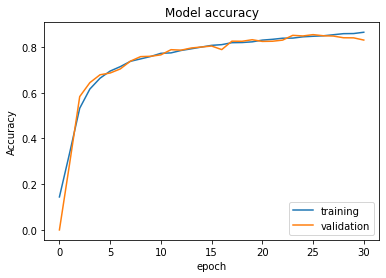

563/563 [==============================] - 5s 9ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1814
           1       0.78      0.94      0.85      1828
           2       0.86      0.90      0.88      1803
           3       0.77      0.87      0.81      1719
           4       0.94      0.87      0.90      1812
           5       0.89      0.79      0.84      1768
           6       0.90      0.83      0.86      1832
           7       0.91      0.89      0.90      1808
           8       0.88      0.78      0.83      1812
           9       0.87      0.81      0.84      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000

The confusion matrix as : 
 


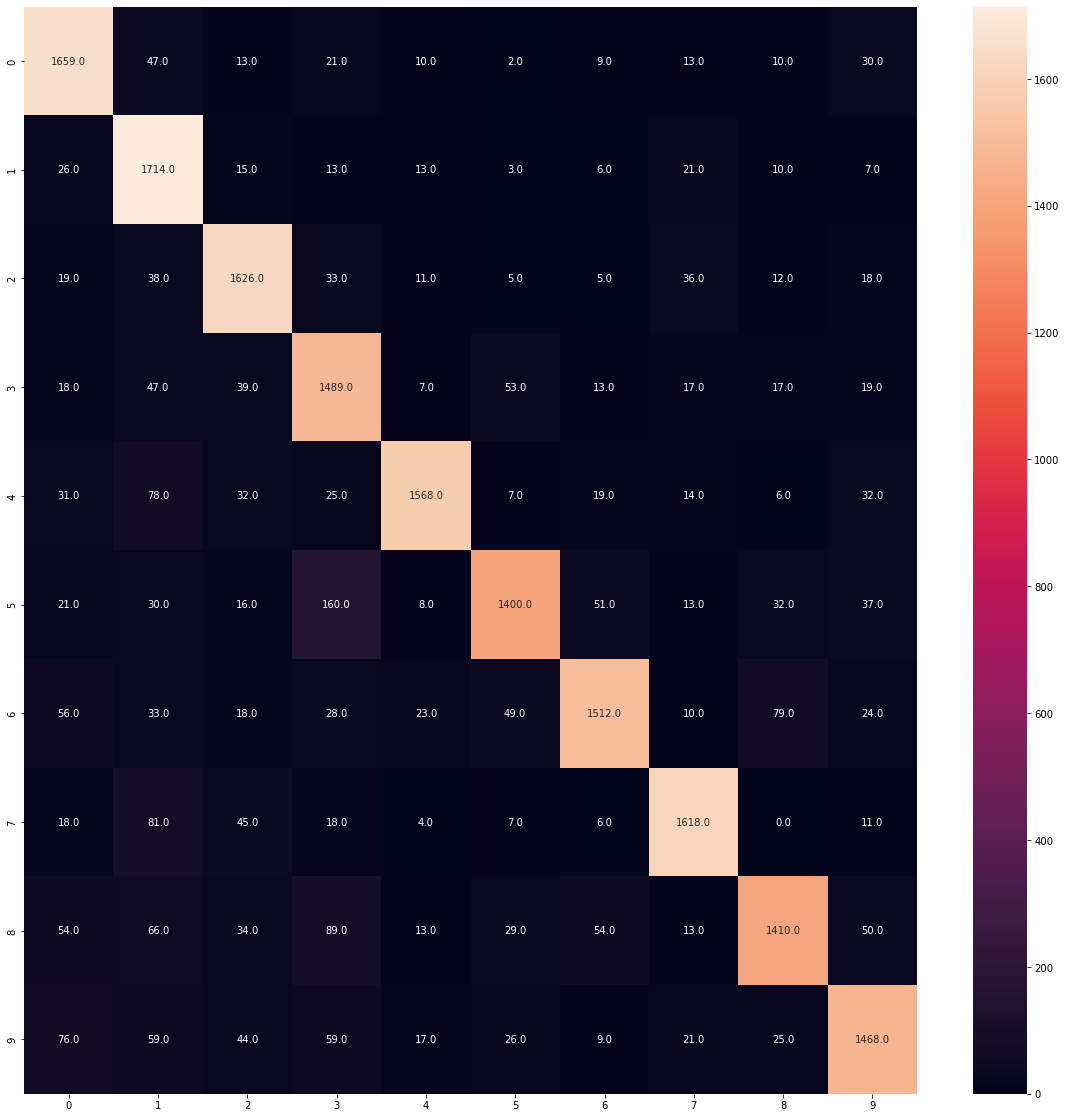

In [254]:
model_dev(a = 700,add1 = True,b=350,add2 = True,c = 175,act_func='relu')


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

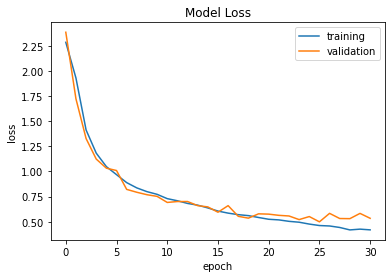

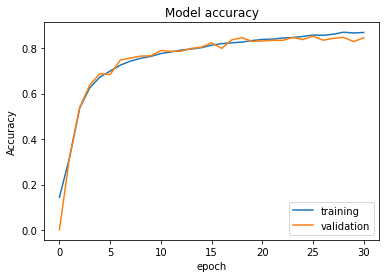

563/563 [==============================] - 4s 6ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1814
           1       0.83      0.94      0.88      1828
           2       0.87      0.92      0.90      1803
           3       0.85      0.87      0.86      1719
           4       0.91      0.92      0.91      1812
           5       0.91      0.80      0.85      1768
           6       0.89      0.86      0.88      1832
           7       0.94      0.87      0.91      1808
           8       0.90      0.78      0.84      1812
           9       0.83      0.87      0.85      1804

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000

The confusion matrix as : 
 


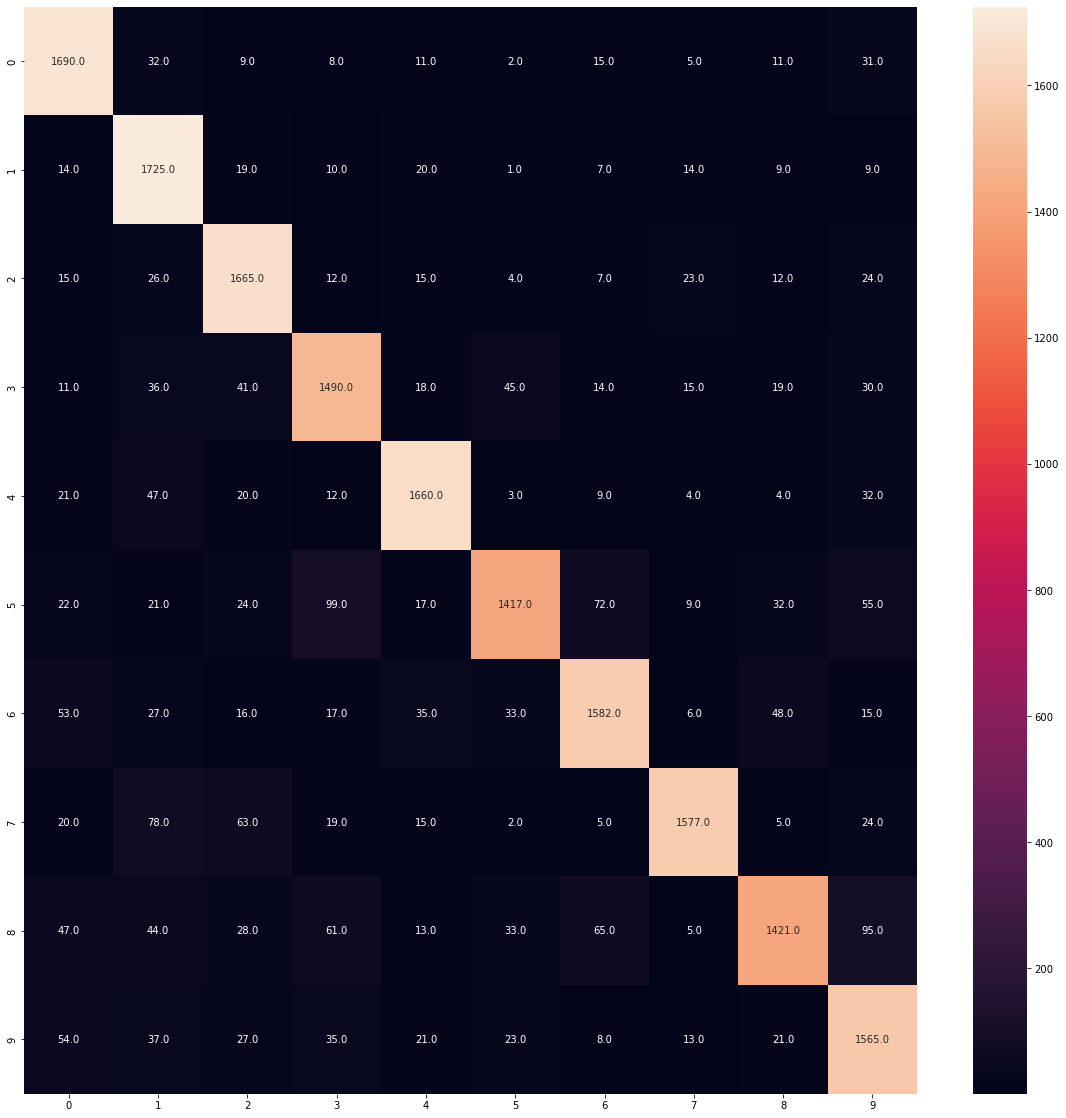

In [255]:
model_dev(a = 700,add1 = True,b=500,add2 = True,c = 175,act_func='relu')


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

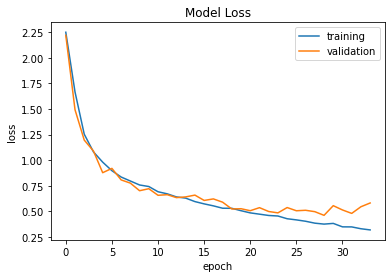

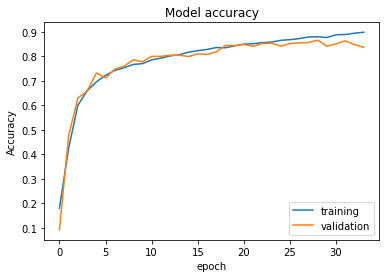

563/563 [==============================] - 7s 13ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1814
           1       0.92      0.87      0.89      1828
           2       0.87      0.92      0.90      1803
           3       0.76      0.91      0.83      1719
           4       0.91      0.90      0.90      1812
           5       0.88      0.85      0.87      1768
           6       0.89      0.83      0.86      1832
           7       0.95      0.85      0.90      1808
           8       0.82      0.83      0.82      1812
           9       0.90      0.86      0.88      1804

    accuracy                           0.87     18000
   macro avg       0.88      0.87      0.87     18000
weighted avg       0.88      0.87      0.87     18000

The confusion matrix as : 
 


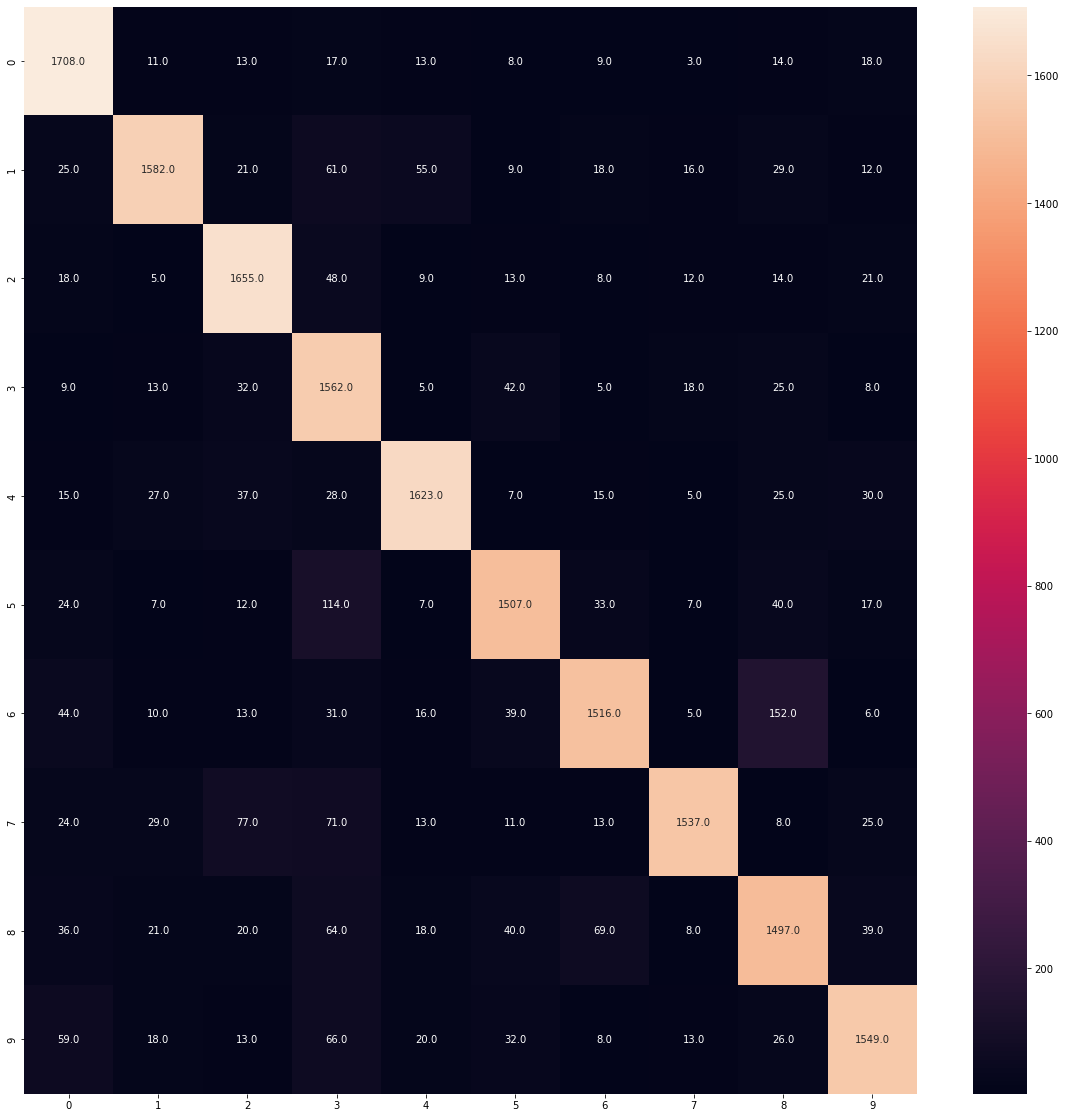

In [256]:
model_dev(a = 700,add1 = True,b=500,add2 = True,c = 500,act_func='relu')


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

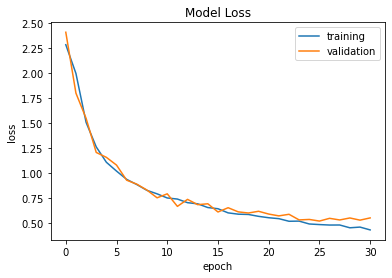

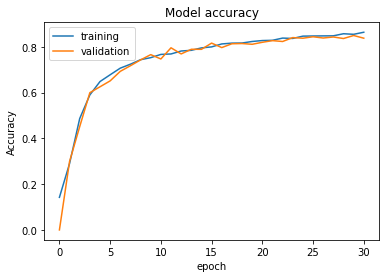

563/563 [==============================] - 6s 11ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1814
           1       0.79      0.93      0.85      1828
           2       0.87      0.90      0.88      1803
           3       0.82      0.84      0.83      1719
           4       0.92      0.87      0.90      1812
           5       0.88      0.80      0.84      1768
           6       0.86      0.85      0.86      1832
           7       0.85      0.93      0.89      1808
           8       0.84      0.79      0.82      1812
           9       0.91      0.78      0.84      1804

    accuracy                           0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000

The confusion matrix as : 
 


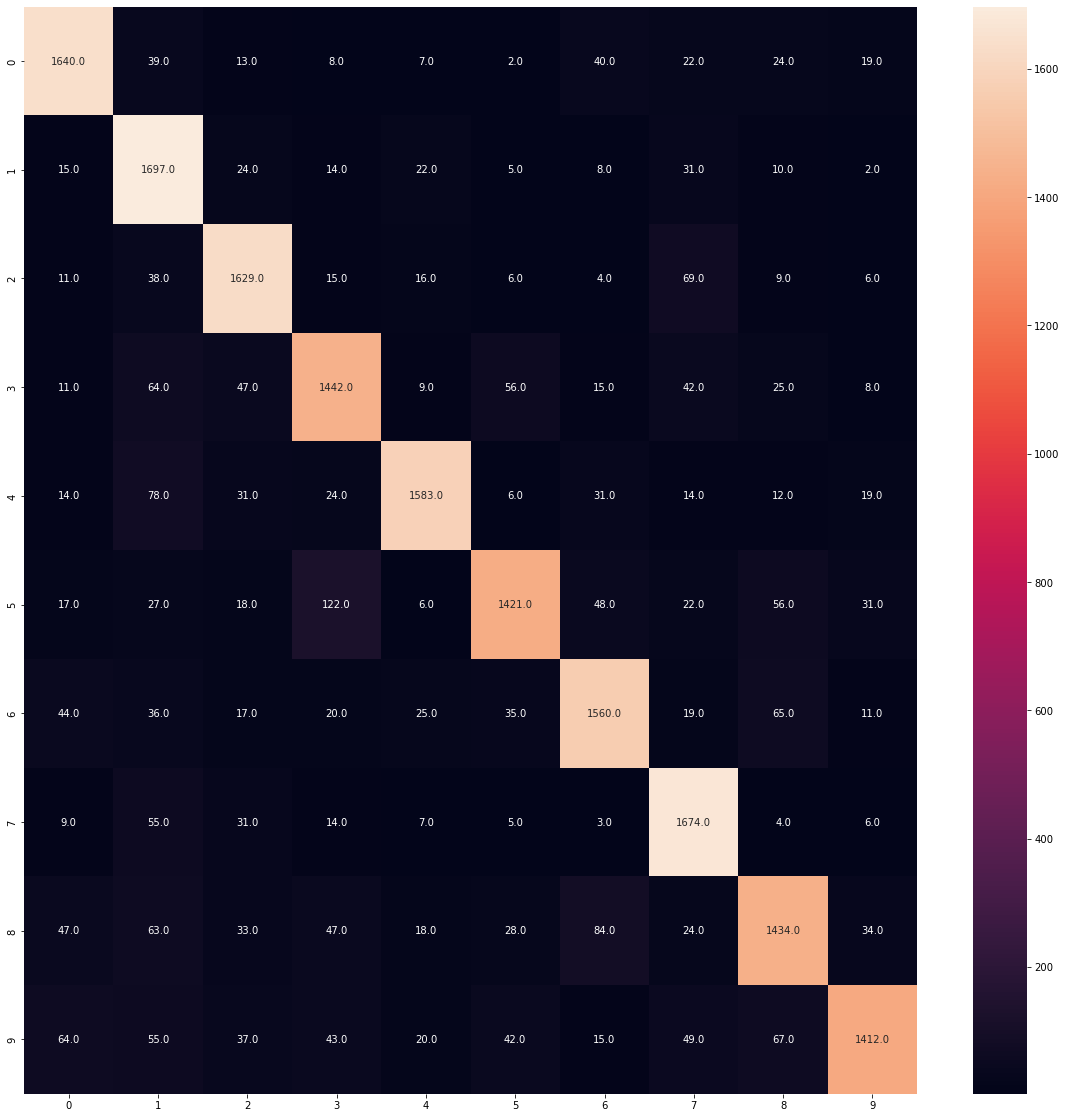

In [257]:
model_dev(a = 700,add1 = True,b=350,add2 = True,c = 175,add3 = True,d = 90,act_func='relu')


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

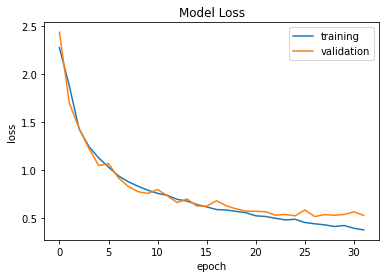

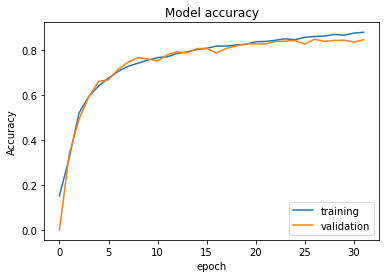

563/563 [==============================] - 5s 8ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      1814
           1       0.87      0.89      0.88      1828
           2       0.81      0.91      0.86      1803
           3       0.88      0.84      0.86      1719
           4       0.90      0.90      0.90      1812
           5       0.83      0.87      0.85      1768
           6       0.89      0.86      0.87      1832
           7       0.87      0.90      0.88      1808
           8       0.93      0.75      0.83      1812
           9       0.86      0.85      0.85      1804

    accuracy                           0.87     18000
   macro avg       0.87      0.87      0.87     18000
weighted avg       0.87      0.87      0.87     18000

The confusion matrix as : 
 


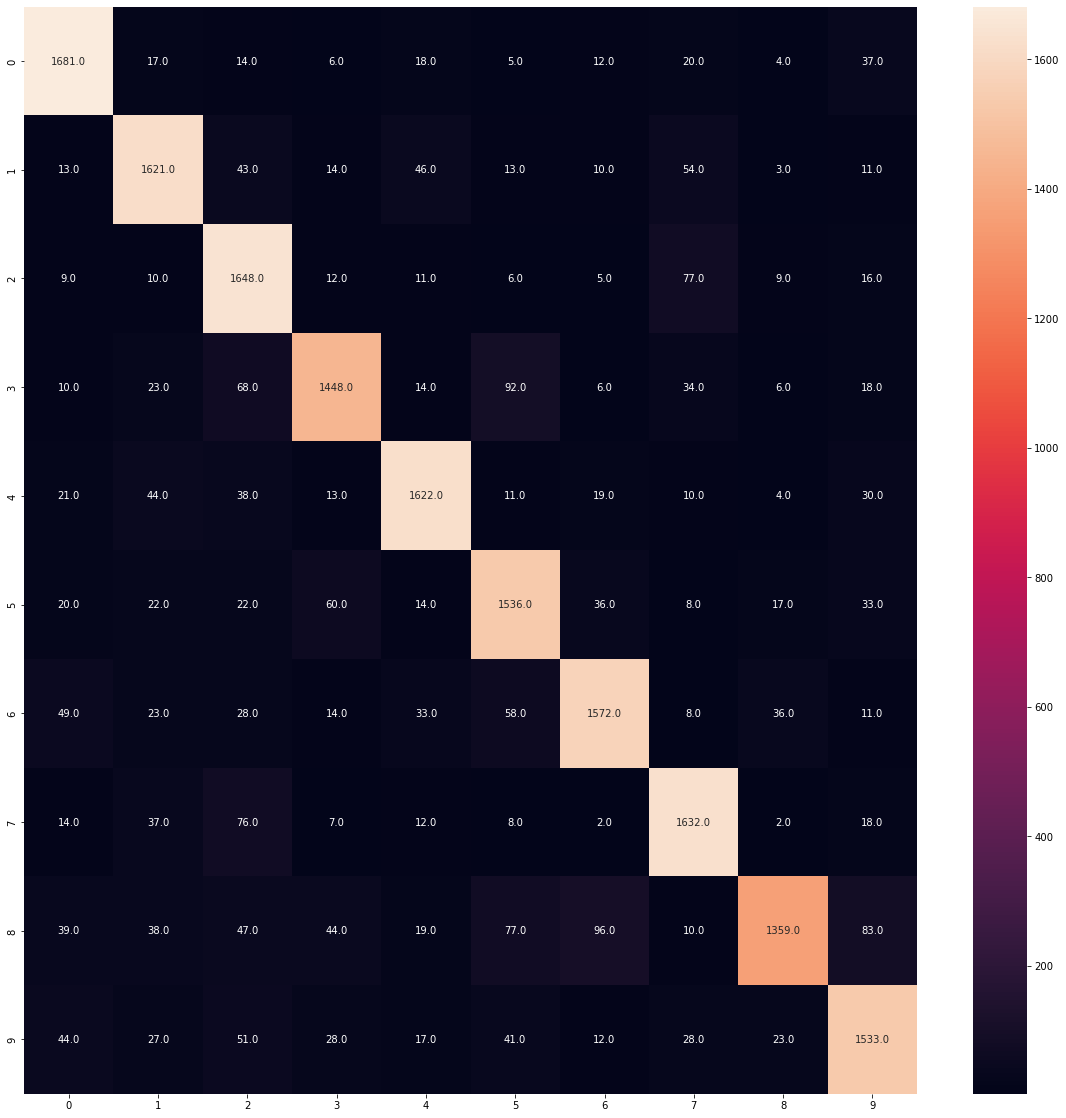

In [258]:
model_dev(a = 700,add1 = True,b=350,add2 = True,c = 700,add3 = True,d = 90,act_func='relu')


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

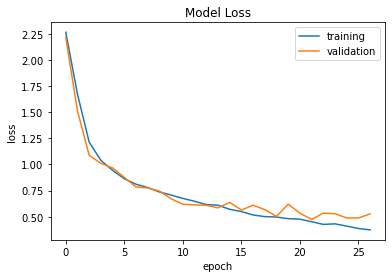

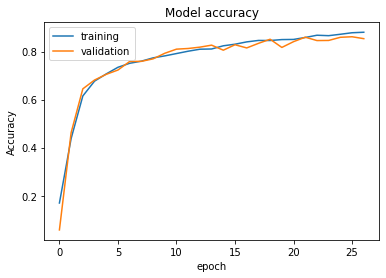

563/563 [==============================] - 5s 8ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      1814
           1       0.86      0.93      0.89      1828
           2       0.95      0.88      0.91      1803
           3       0.86      0.84      0.85      1719
           4       0.91      0.91      0.91      1812
           5       0.81      0.89      0.85      1768
           6       0.89      0.85      0.87      1832
           7       0.95      0.89      0.92      1808
           8       0.92      0.78      0.85      1812
           9       0.85      0.86      0.85      1804

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000

The confusion matrix as : 
 


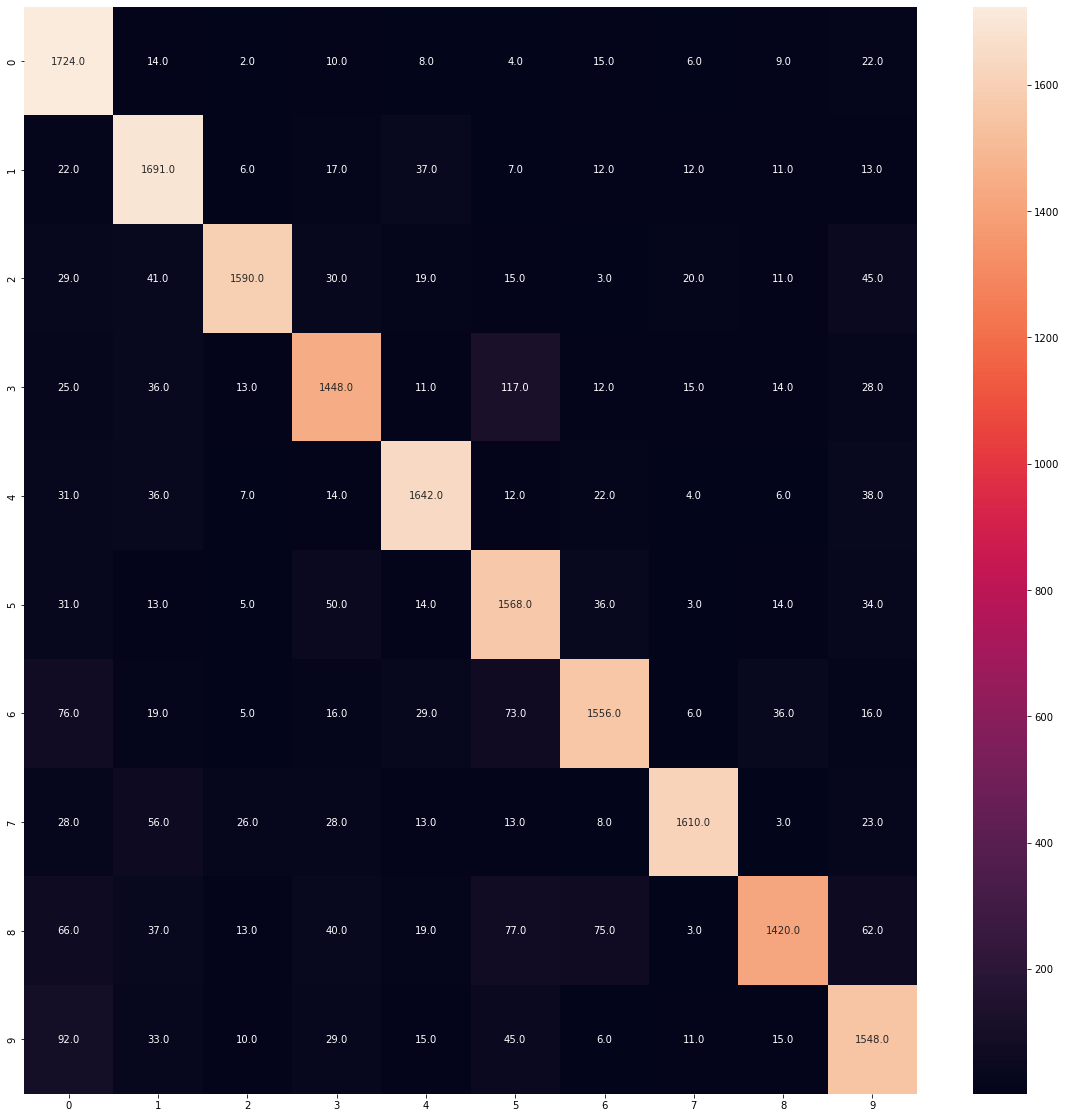

In [259]:
model_dev(a = 700,add1 = True,b=500,add2 = True,c = 500,act_func='relu',wt1='he_uniform')

In [260]:
es2 = EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

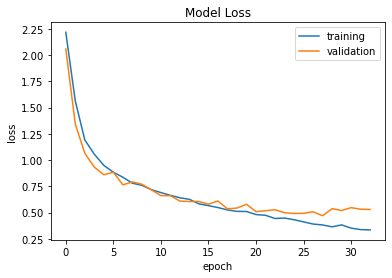

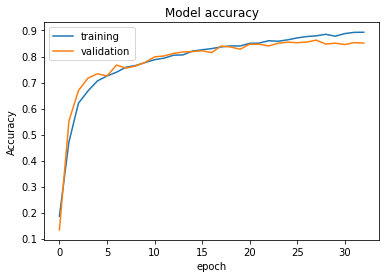

563/563 [==============================] - 5s 8ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1814
           1       0.89      0.95      0.92      1828
           2       0.93      0.95      0.94      1803
           3       0.89      0.91      0.90      1719
           4       0.94      0.94      0.94      1812
           5       0.92      0.90      0.91      1768
           6       0.93      0.90      0.92      1832
           7       0.95      0.93      0.94      1808
           8       0.91      0.88      0.89      1812
           9       0.93      0.89      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000

The confusion matrix as : 
 


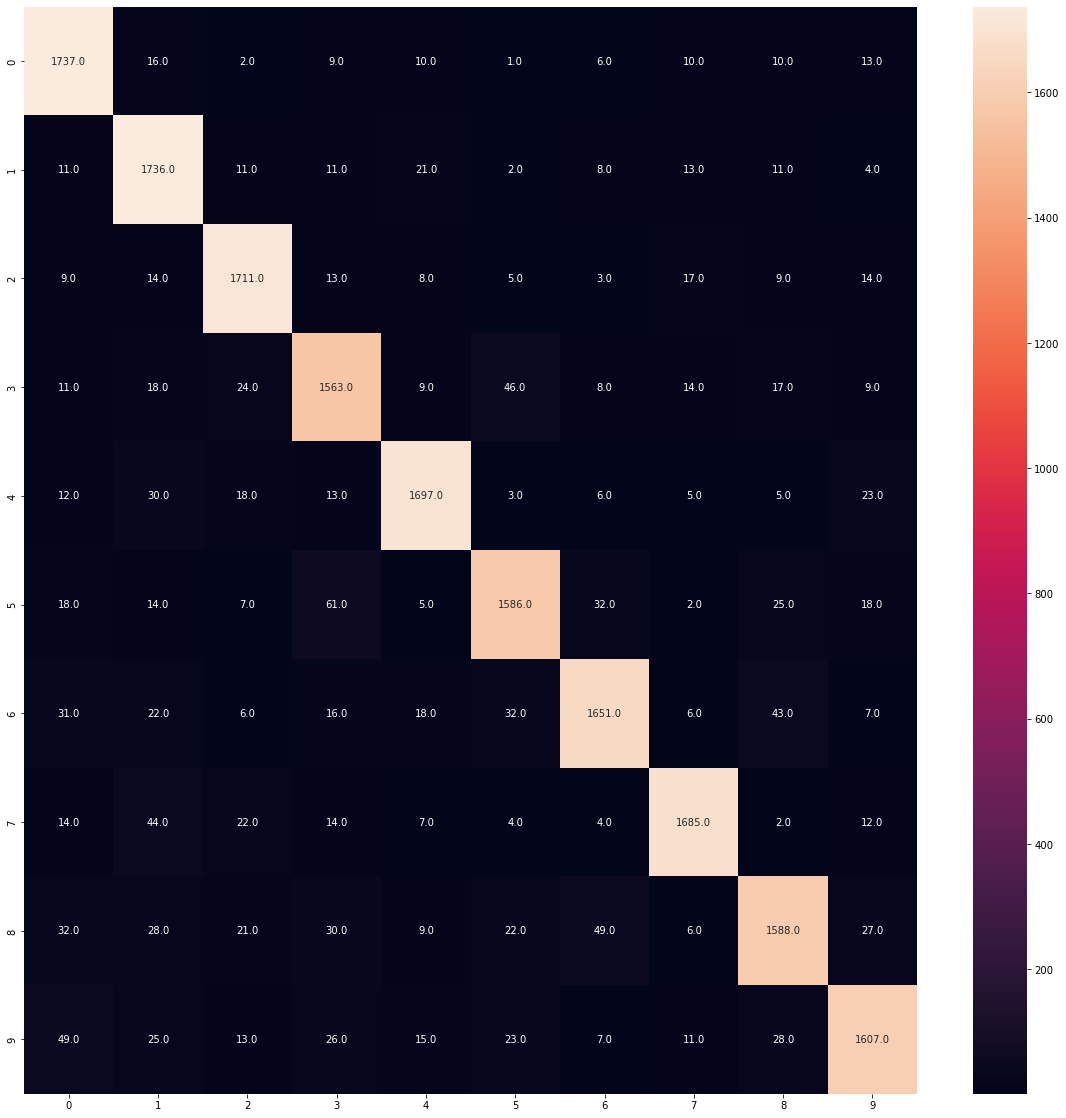

In [261]:
model_dev(a = 700,add1 = True,b=700,add2 = True,c = 500,act_func='relu',opt=tf.keras.optimizers.Adam(amsgrad=True,use_ema=True),earl_stp = earl_stp,batch_size=500,epochs=150)


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

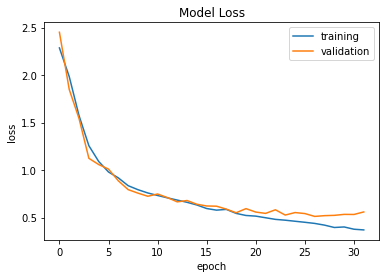

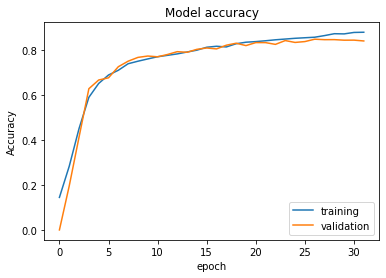

563/563 [==============================] - 5s 8ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1814
           1       0.89      0.95      0.92      1828
           2       0.92      0.94      0.93      1803
           3       0.87      0.90      0.88      1719
           4       0.94      0.92      0.93      1812
           5       0.90      0.87      0.89      1768
           6       0.92      0.89      0.90      1832
           7       0.94      0.92      0.93      1808
           8       0.91      0.86      0.88      1812
           9       0.91      0.87      0.89      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

The confusion matrix as : 
 


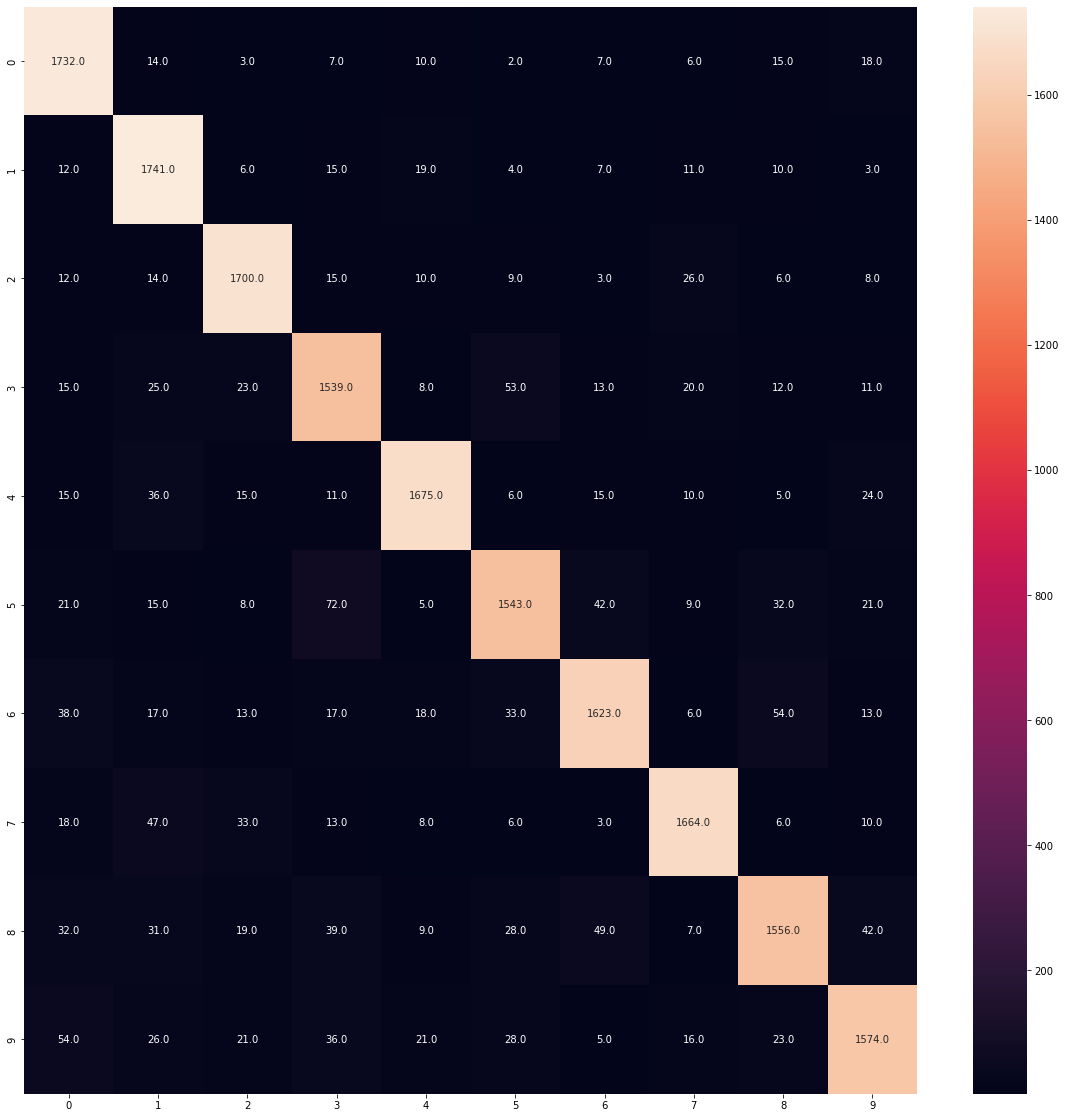

In [262]:
model_dev(a = 1000,add1 = True,b=500,add2 = True,c = 250,add3 = True,d = 150,act_func='relu',opt=tf.keras.optimizers.Adam(amsgrad=True,use_ema=True),earl_stp = earl_stp,batch_size=500,epochs=150)


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

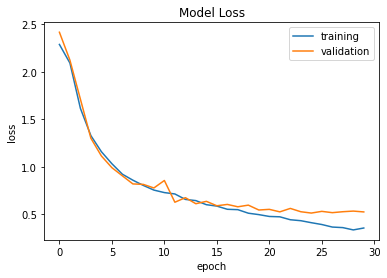

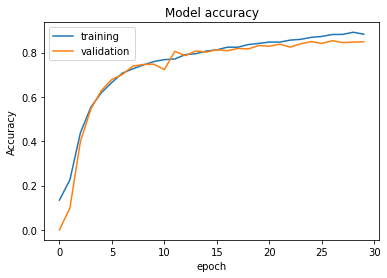

563/563 [==============================] - 7s 12ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1814
           1       0.90      0.96      0.93      1828
           2       0.94      0.95      0.95      1803
           3       0.89      0.93      0.91      1719
           4       0.95      0.93      0.94      1812
           5       0.92      0.89      0.90      1768
           6       0.92      0.90      0.91      1832
           7       0.95      0.92      0.93      1808
           8       0.91      0.87      0.89      1812
           9       0.93      0.89      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000

The confusion matrix as : 
 


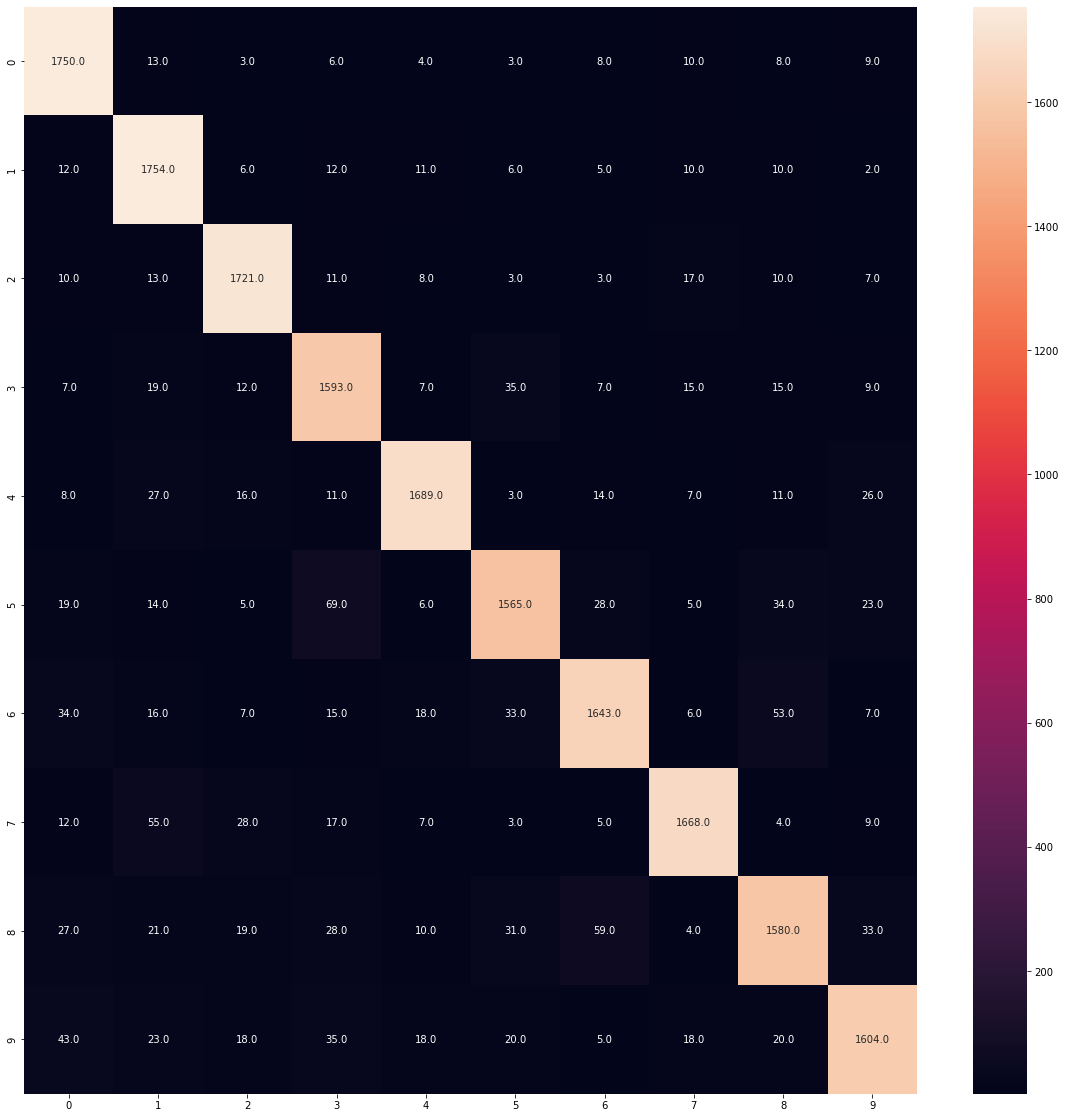

In [263]:
model_dev(a = 1500,add1 = True,b=750,add2 = True,c = 500,add3 = True,d = 250,add4 = True,e = 100,act_func='relu',opt=tf.keras.optimizers.Adam(amsgrad=True,use_ema=True),earl_stp = earl_stp,batch_size=500,epochs=150)


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

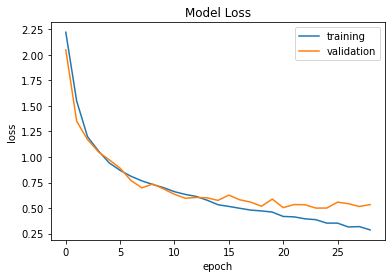

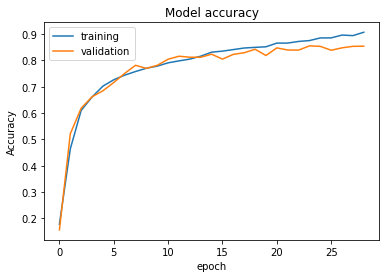

563/563 [==============================] - 9s 15ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1814
           1       0.91      0.96      0.93      1828
           2       0.95      0.96      0.96      1803
           3       0.90      0.93      0.92      1719
           4       0.95      0.94      0.95      1812
           5       0.92      0.91      0.91      1768
           6       0.94      0.91      0.93      1832
           7       0.96      0.93      0.95      1808
           8       0.92      0.90      0.91      1812
           9       0.93      0.91      0.92      1804

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000

The confusion matrix as : 
 


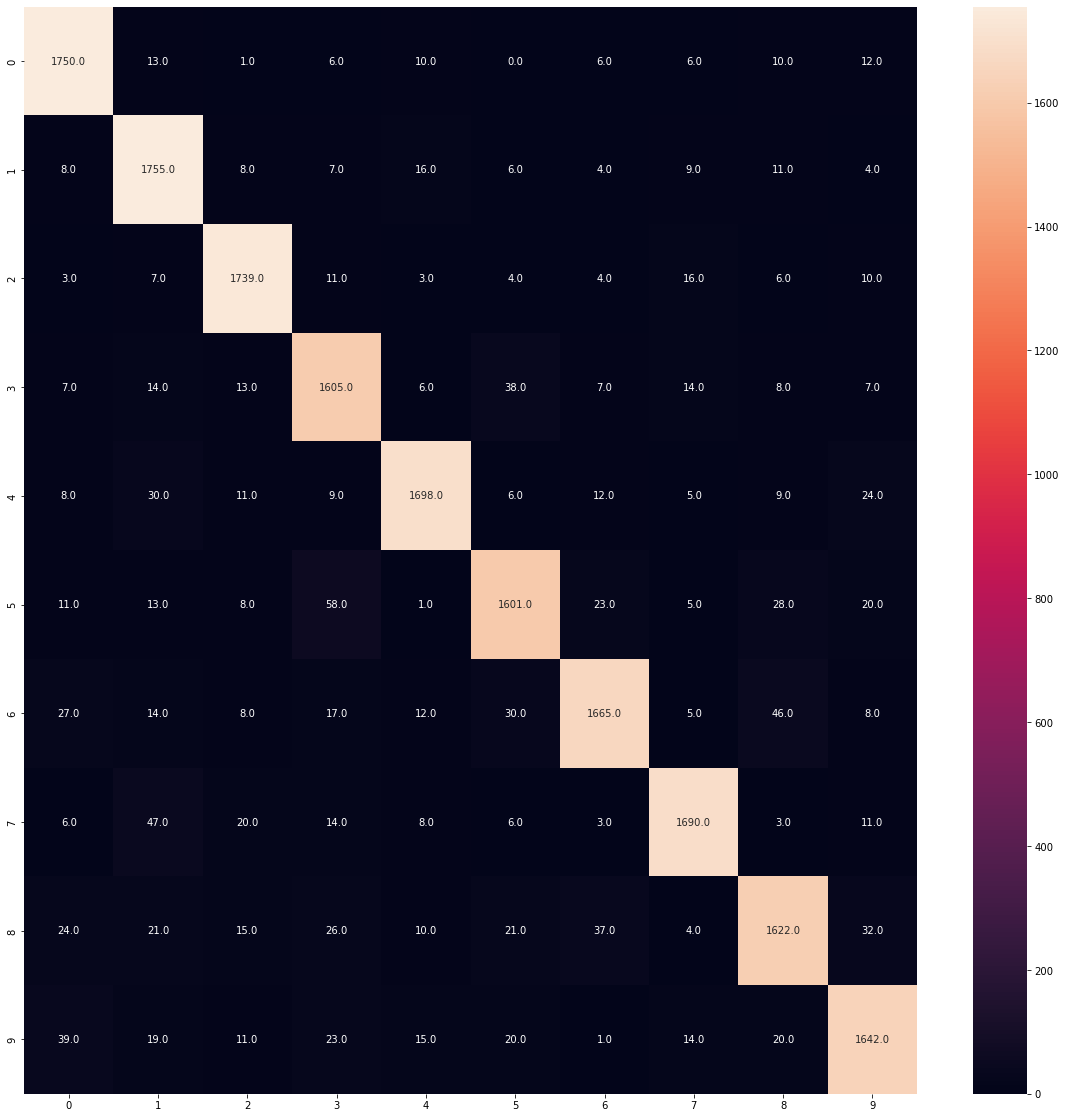

In [264]:
model_dev(a = 700,add1 = True,b=700,add2 = True,c = 500,add3=True,d=500,act_func='relu',opt=tf.keras.optimizers.Adam(amsgrad=True,use_ema=True),earl_stp = earl_stp,batch_size=500,epochs=150)


Epoch 1: saving model to model_weights.h5

Epoch 2: saving model to model_weights.h5

Epoch 3: saving model to model_weights.h5

Epoch 4: saving model to model_weights.h5

Epoch 5: saving model to model_weights.h5

Epoch 6: saving model to model_weights.h5

Epoch 7: saving model to model_weights.h5

Epoch 8: saving model to model_weights.h5

Epoch 9: saving model to model_weights.h5

Epoch 10: saving model to model_weights.h5

Epoch 11: saving model to model_weights.h5

Epoch 12: saving model to model_weights.h5

Epoch 13: saving model to model_weights.h5

Epoch 14: saving model to model_weights.h5

Epoch 15: saving model to model_weights.h5

Epoch 16: saving model to model_weights.h5

Epoch 17: saving model to model_weights.h5

Epoch 18: saving model to model_weights.h5

Epoch 19: saving model to model_weights.h5

Epoch 20: saving model to model_weights.h5

Epoch 21: saving model to model_weights.h5

Epoch 22: saving model to model_weights.h5

Epoch 23: saving model to model_weights.

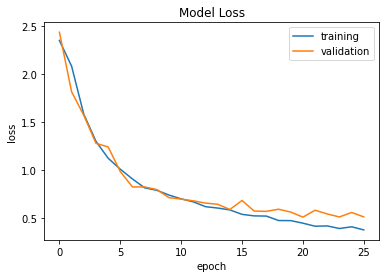

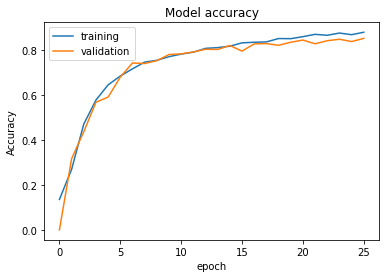

563/563 [==============================] - 8s 15ms/step
The classification report is : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1814
           1       0.87      0.94      0.91      1828
           2       0.92      0.94      0.93      1803
           3       0.87      0.89      0.88      1719
           4       0.94      0.92      0.93      1812
           5       0.91      0.87      0.89      1768
           6       0.93      0.87      0.90      1832
           7       0.93      0.93      0.93      1808
           8       0.91      0.87      0.89      1812
           9       0.92      0.88      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000

The confusion matrix as : 
 


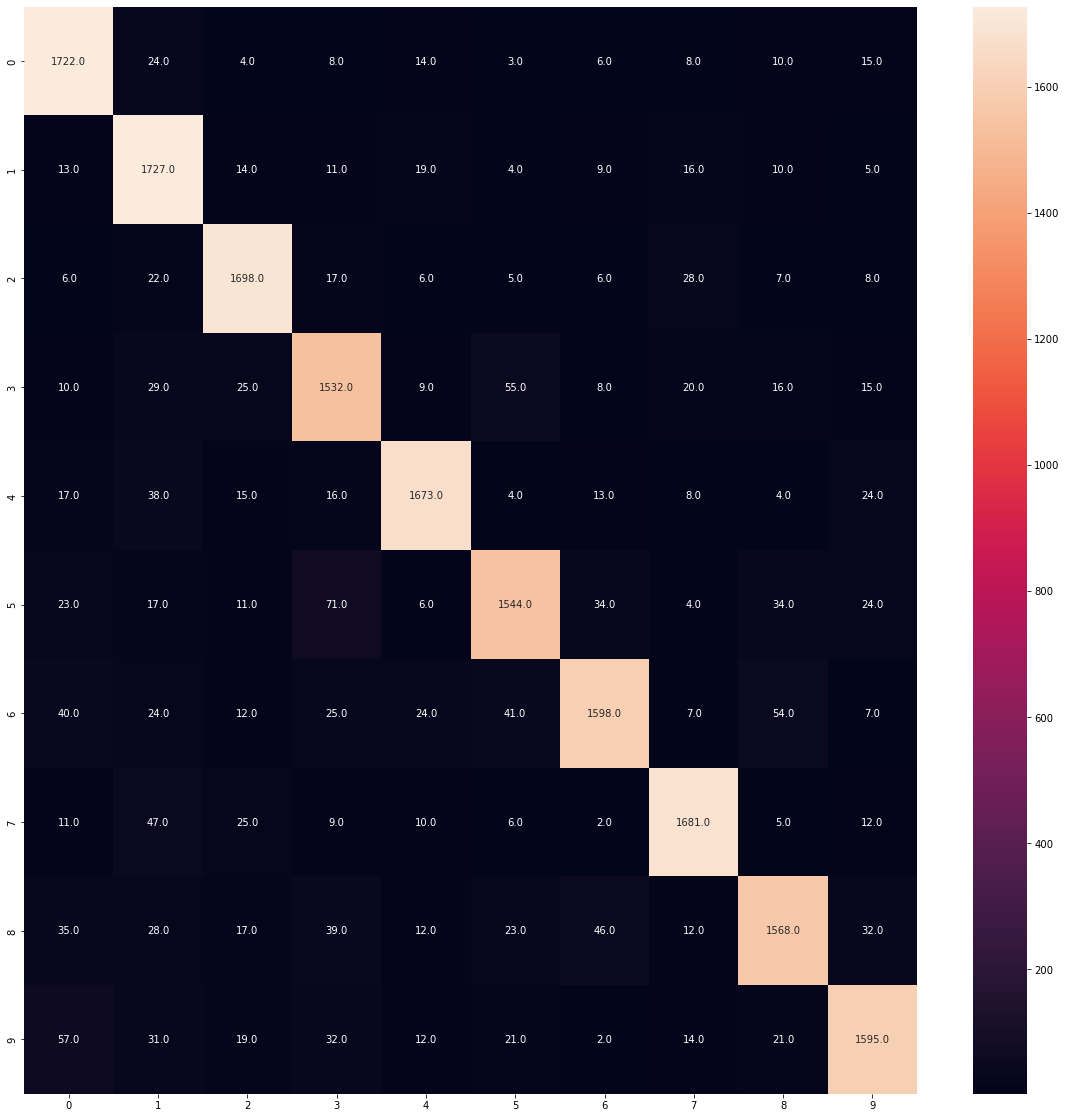

In [269]:
model_dev(a = 700,add1 = True,b=700,add2 = True,c = 500,add3=True,d=500,act_func='relu',opt=tf.keras.optimizers.Adam(amsgrad=True,use_ema=True),earl_stp = earl_stp,batch_size=1000,epochs=150,wt1 = 'he_uniform')

## Observations:
    - we are getting a better accuracy upto  93% and most likely to be generalized model.
    - There are more number of misclassifications happened for,
        - '3' classified as '5'
        - '6' classified as '8'
        - '1' classified as '7'